### ETAPA 1: PREPROCESAMIENTO DE DATOS DE INMIGRACIÓN
Análisis inicial sobre datos demográficos de inmigrantes internacionales en España para los años 2008 - 2021 (*24287.csv*) y 2021-2022 (*61623.csv*).

*Fuente: Instituto Nacional de Estadística (INE) de España, https://www.ine.es/dynt3/inebase/index.htm?padre=3694&capsel=1963*

In [1]:
# Dependencias básicas
import pandas as pd
import numpy as np

# Dependencias de visualización
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt

# Dependencias de machine learning
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact

In [2]:
# Desactivar el límite de máximo por defecto de 5,000 filas para las visulizaciones con la librería Altair
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

#### *Carga de Datos y Vista Inicial*

In [3]:
# Lectura y visualización de dataset "24287" y "61623"
df_0821 = pd.read_csv(
    "../1 - Inmigrantes/Datos Nacionales/24287.csv",
    encoding = "utf-8",
    delimiter = ";",
    decimal = ",",
    thousands = "."
)

df_2122 = pd.read_csv(
    "../1 - Inmigrantes/Datos Nacionales/61623.csv",
    encoding = "utf-8",
    delimiter = ";",
    decimal = ",",
    thousands = "."
)

df_0821.info()
df_0821

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59640 entries, 0 to 59639
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  59640 non-null  object 
 1   Nationality          59640 non-null  object 
 2   Five-year age group  59640 non-null  object 
 3   Periodo              59640 non-null  int64  
 4   Total                55563 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


,Sex,Nationality,Five-year age group,Periodo,Total
0,Both sexes,Total,Total,2021,528856.0
1,Both sexes,Total,Total,2020,467918.0
2,Both sexes,Total,Total,2019,750480.0
3,Both sexes,Total,Total,2018,643684.0
4,Both sexes,Total,Total,2017,532132.0
...,...,...,...,...,...
59635,Females,Stateless persons,90 years old and over,2012,NaN
59636,Females,Stateless persons,90 years old and over,2011,NaN
59637,Females,Stateless persons,90 years old and over,2010,NaN
59638,Females,Stateless persons,90 years old and over,2009,NaN


In [4]:
df_2122.info()
df_2122

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9936 entries, 0 to 9935
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   País de nacimiento  9936 non-null   object
 1   Nacionalidad        9936 non-null   object
 2   Edad                9936 non-null   object
 3   Sexo                9936 non-null   object
 4   Periodo             9936 non-null   int64 
 5   Total               9936 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 465.9+ KB


,País de nacimiento,Nacionalidad,Edad,Sexo,Periodo,Total
0,Total,Total,Total,Ambos Sexos,2022,1258894
1,Total,Total,Total,Ambos Sexos,2021,887960
2,Total,Total,Total,Hombre,2022,626804
3,Total,Total,Total,Hombre,2021,467162
4,Total,Total,Total,Mujer,2022,632090
...,...,...,...,...,...,...
9931,Extranjero,Apátridas,De 65 y más años,Ambos Sexos,2021,9
9932,Extranjero,Apátridas,De 65 y más años,Hombre,2022,3
9933,Extranjero,Apátridas,De 65 y más años,Hombre,2021,3
9934,Extranjero,Apátridas,De 65 y más años,Mujer,2022,4


*Observaciones:*
- Tenemos datos nulos en el número de inmigrantes en el conjunto de datos de los años 2008-2021, pero estos se corresponden a "cero inmigrantes". Y vemos también que importó como *float*, aunque sabemos que son valores enteros, ya que representan a cantidad de personas.
- Los formatos cambian entre ambos dataset, especialmente en relación al idioma.
- En ambos datasets tenemos la información del 2021.

Para abordar las observaciones, remplazaremos los datos nulos por "0" en *df_0821* y cambiaremos el tipo de dato a "int". Luego, filtraremos solo nuestros datos de interés de *df_2122* y estandarizaremos el nombre de nuestra variables en ambos conjuntos de datos.

In [5]:
# Reemplazar de valores nulos de cantidad inmigrantes por 0
df_0821.Total.replace(np.nan, 0, inplace = True)

# Conversión de float a integer al ser datos de cuenta de inmigrantes
df_0821.Total = df_0821.Total.astype(int)

# Filtrar y eliminar la variable "País de nacimiento" de df_2122
df_2122 = df_2122[df_2122["País de nacimiento"] == "Total"]
df_2122.drop("País de nacimiento", axis = 1, inplace = True)

# Crear df con solo datos del año 2022
df_22 = df_2122.loc[df_2122['Periodo'] == 2022,:]

# Renombrar columnas
df_0821 = df_0821.rename(columns={'Five-year age group':'Age group', 
                                  'Periodo':'Year', 
                                  'Total':'Immigrant count'})

df_22 = df_22.rename(columns={'Sexo':'Sex', 'Nacionalidad':'Nationality', 
                              'Edad':'Age group', 'Periodo':'Year', 
                              'Total':'Immigrant count'})

# Reordenar y alinear las columnas de ambos datasets
df_0821 = df_0821[["Year", "Nationality", "Sex", "Age group", "Immigrant count"]]
df_22 = df_22[["Year", "Nationality", "Sex", "Age group", "Immigrant count"]]

C:\temp\ipykernel_16520\2364009021.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2122.drop("País de nacimiento", axis = 1, inplace = True)


In [6]:
# Verificar cambios
df_0821.info()
df_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59640 entries, 0 to 59639
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             59640 non-null  int64 
 1   Nationality      59640 non-null  object
 2   Sex              59640 non-null  object
 3   Age group        59640 non-null  object
 4   Immigrant count  59640 non-null  int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 1656 entries, 0 to 3310
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             1656 non-null   int64 
 1   Nationality      1656 non-null   object
 2   Sex              1656 non-null   object
 3   Age group        1656 non-null   object
 4   Immigrant count  1656 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 77.6+ KB


#### *Evaluar Variables Categóricas*

Ahora estudiaremos las categorías/grupos que toman nuestras variables "Sex", "Nationality" y "Age group" para observar la presencia errores y también evaluar la cantidad de valores que toma cada una.

In [7]:
# Seleccionar variables categóricas en ambos datasets
categoricas_0821 = df_0821.select_dtypes(include = ['object'])
categoricas_22 = df_22.select_dtypes(include = ['object'])

# Mostrar valores únicos por variable categórica
print ('------------------------- \033[1m DATOS 2008 - 2021 \033[0m ---------------------------\n')
for col in categoricas_0821:
    print(f"\033[1m {col}:\033[0m", len(df_0821[col].unique()), "valores \n \n", df_0821[col].unique(), "\n")
    
print ('----------------------------- \033[1m DATOS 2022 \033[0m ------------------------------- \n')
for col in categoricas_22:
    print(f"\033[1m {col}:\033[0m", len(df_22[col].unique()), "valores \n \n", df_22[col].unique(), "\n")

-------------------------  DATOS 2008 - 2021  ---------------------------

 Nationality: 71 valores 
 
 ['Total' 'Spanish ' 'País de la UE27_2020 sin España'
 'País de la UE28 sin España' 'Belgium' 'Bulgaria' 'Denmark' 'Finland'
 'France' 'Ireland' 'Italy' 'Netherlands' 'Poland' 'Portugal' 'Germany'
 'Romania' 'Sweden' 'Lithuania' 'Other countries of the European Union'
 'País de Europa menos UE27_2020' 'United Kingdom'
 'País de Europa menos UE28' 'Norway' 'Switzerland' 'Ukraine' 'Moldova'
 'Russia' 'Other European Union countries' 'De Africa' 'Algeria'
 'The Gambia' 'GHANA' 'Guinea' 'Equatorial Guinea' 'Mali' 'Morocco'
 'Mauritania' 'Nigeria' 'Senegal' 'Other African countries'
 'De América del Norte' 'United States of America' 'Mexico' 'Canada'
 'De Centro América y Caribe' 'Cuba' 'Honduras' 'Nicaragua'
 'Dominican Republic' 'Other Central American and Caribbean countries'
 'De Sudamérica' 'Argentina' 'Bolivia' 'Brazil' 'Colombia' 'Chile'
 'Ecuador' 'Paraguay' 'Peru' 'Uruguay' 'Vene

*Observaciones:*
- Notamos nuevamente la diferencia entre los datasets en relación al idioma y los valores que toman las tres variables.
- Hay una cantidad muy grande de nacionalidades, y también observamos agrupaciones de regiones/continentes como: "UE27_2020 sin España", "Otro país de Asia", "America del Norte", entre otros.
- Los grupos de edades son diferentes entre los datasets, en el primero (*df_0821*) hay rangos de edades que aumentan intervalos de cinco años ("From 0 to 4 years old", "From 5 to 9 years", ...), mientras que en el segundo (*df_22*) los rangos son más amplios ("De 0 a 15 años", "De 16 a 24 años", ...). También observamos que algunas de las categorías del 2008-2021 tienen espacios en blanco.

Para abordar estas observaciones, alineremos los grupos de edades entre los datasets y la nomenclatura de dichos grupos; también lo haremos con la variable "Sex". Además, estudiaremos las nacionalidades más representativas de cada año para acotar nuestros datos en torno a las top nacionalidades de inmigrantes y eliminaresmos aquellas que representan regiones/continentes.

#### *Estandarización de Categorías para "Age group" y "Sex"*

Debido a que hay una inconsistencia en el punto de corte de los grupos de edades de ambos datasets en 14 vs 15 años para los grupos de menor edad, y ya que en la página oficial del INE no se aportan detalles adicionales, se consideró un error de formato y se unificaron los grupos con corte en 14 años según el dataset *df_0821*.

In [8]:
# Estandarización de valores para mapeo posterior
mapeo_0821 = {
    "Total": "All",
    "From 0 to 4 years old": "0 - 14",
    "From 5 to 9 years": "0 - 14",
    "From 10 to 14 years": "0 - 14",
    "From 15 to 19 years": "15 - 24",
    "From 20 to 24 years": "15 - 24",
    "From 25 to 29 years": "25 - 34",
    "From 30 to 34 years old": "25 - 34",
    "From 35 to 39 years old": "35 - 44",
    "From 40 to 44 years": "35 - 44",
    "From 45 to 49 years old": "45 - 54",
    "From 50 to 54 years old": "45 - 54",
    "From 55 to 59 years old": "55 - 64",
    "From 60 to 64 years old": "55 - 64",
    "From 65 to 69 years old": "65+",
    "From 70 to 74 years": "65+",
    "From 75 to 79 years": "65+",
    "From 80 to 84 years": "65+",
    "From 85 to 89 years": "65+",
    "90 years old and over": "65+"
}

mapeo_22 = {
    "Total": "All",
    "De 0 a 15 años": "0 - 14", 
    "De 16 a 24 años": "15 - 24",
    "De 25 a 34 años": "25 - 34", 
    "De 35 a 44 años": "35 - 44",
    "De 45 a 54 años": "45 - 54",
    "De 55 a 64 años": "55 - 64",
    "De 65 y más años": "65+"
}

In [9]:
# Mapeo de grupos de edad
df_0821['Age group'] = df_0821['Age group'].str.strip()
df_0821['Age group'] = df_0821['Age group'].map(mapeo_0821)

df_22['Age group'] = df_22['Age group'].map(mapeo_22)

# Verificar cambio
print('\033[1m------------------------- Variable "Age group" -------------------------\033[0m \n')

print(f"\033[1m DATOS 2008 - 2021:\033[0m", 
      len(df_0821['Age group'].unique()), "grupos \n \n", 
      df_0821['Age group'].unique(), "\n")

print(f"\033[1m DATOS 2022:\033[0m", 
      len(df_22['Age group'].unique()), "grupos \n \n", 
      df_22['Age group'].unique(), "\n")

------------------------- Variable "Age group" ------------------------- 

 DATOS 2008 - 2021: 8 grupos 
 
 ['All' '0 - 14' '15 - 24' '25 - 34' '35 - 44' '45 - 54' '55 - 64' '65+'] 

 DATOS 2022: 8 grupos 
 
 ['All' '0 - 14' '15 - 24' '25 - 34' '35 - 44' '45 - 54' '55 - 64' '65+'] 



Luego, realizamos una agrupación y sumatoria de inmigrantes según las nuevas categorías.

In [10]:
# Crear dataframe 2008-2021 de inmigrantes agrupados según las nuevas categorías de edades
grouped_0821 = (
    df_0821.groupby(['Year', 'Nationality', 'Sex', 'Age group'])['Immigrant count']
    .sum()
    .reset_index()
)

grouped_0821

,Year,Nationality,Sex,Age group,Immigrant count
0,2008,Algeria,Both sexes,0 - 14,759
1,2008,Algeria,Both sexes,15 - 24,1166
2,2008,Algeria,Both sexes,25 - 34,2151
3,2008,Algeria,Both sexes,35 - 44,888
4,2008,Algeria,Both sexes,45 - 54,313
...,...,...,...,...,...
23851,2021,Venezuela,Males,35 - 44,1866
23852,2021,Venezuela,Males,45 - 54,926
23853,2021,Venezuela,Males,55 - 64,647
23854,2021,Venezuela,Males,65+,587


In [11]:
# Comprobación de sumas
sum(df_0821['Immigrant count']) - sum(grouped_0821['Immigrant count'])

0

Ahora estandarizamos las categorías de sexo:

In [12]:
# Estandarizar categorías de la variable "Sex"
grouped_0821['Sex'] = grouped_0821['Sex'].map({'Both sexes':'Both', 'Males': 'Males', 'Females': 'Females'})

df_22['Sex'] = df_22['Sex'].map({'Ambos Sexos' : 'Both', 'Hombre': 'Males', 'Mujer': 'Females'})

# Verificar cambio
print('\033[1m------- Variable "Sex" -------\033[0m \n')

print(f"\033[1m Datos 2008 - 2021:\033[0m", 
      len(grouped_0821['Sex'].unique()), "valores \n \n", 
      grouped_0821['Sex'].unique(), "\n")

print(f"\033[1m Datos 2022:\033[0m", 
      len(df_22['Sex'].unique()), "categorías \n \n", 
      df_22['Sex'].unique(), "\n")

------- Variable "Sex" ------- 

 Datos 2008 - 2021: 3 valores 
 
 ['Both' 'Females' 'Males'] 

 Datos 2022: 3 categorías 
 
 ['Both' 'Males' 'Females'] 



#### *Análisis Exploratorio de Inmigración Total*

Antes de continuar con el análisis de las nacionalidades, observemos brevemente el comportamiento global de los datos de inmigración.

In [13]:
# Concatenar conteo de inmigrantes totales de ambos datasets
totales_0821 = grouped_0821[grouped_0821["Nationality"] == "Total"]
totales_22 = df_22[df_22["Nationality"] == "Total"]
totales = pd.concat([totales_0821, totales_22], axis = 0, ignore_index = True)

# Graficar la cantidad total de inmigrantes en el tiempo
alt.Chart(totales[(totales["Sex"] == "Both") & (totales["Age group"] == "All")], height = 300, width = 700)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y ="Immigrant count",
                    tooltip=["Year","Immigrant count"])\
            .properties(title="Total de Inmigrantes desde 2008 a 2022")

alt.Chart(...)

In [14]:
# Agrupar y obtener conteo total por categorías de edad/sexo
totales_cat = totales[(totales["Sex"] != "Both") & (totales["Age group"] != "All")].groupby(["Sex", "Age group"])["Immigrant count"].sum().to_frame().reset_index()

# Cantidad total de inmigrantes por grupo de edad/sexo
alt.Chart(totales_cat, height = 300, width = 400)\
            .mark_bar()\
            .encode(x=alt.X('Age group', axis=alt.Axis(labelAngle=-360)),
                    y="Immigrant count",
                    color = alt.Color('Sex',scale=alt.Scale(scheme="set1")),
                    tooltip=["Sex", "Immigrant count"])\
            .properties(title="Total de Inmigrantes por Grupo de Edad/Sexo")

alt.Chart(...)

*Observaciones:*
- Entre 2008-2013 hay una caida de número de inmigrantes y a partir del 2014 aumenta progresivamente hasta alcanzar un pico de 750,480 imigrantes en 2019, para luego disminuir en el 2020 y 2021 (período de pandemia y restricciones sanitarias relacionadas al COVID 19) y mostrar un gran salto hasta ≈1.25 millones de inmigrantes en el 2022 (post-pandemia), superando al 2019 en aproximadamente 500,000 inmigrantes.
- Observando los inmigrantes que llegaron a España durante estos 15 años según la edad, vemos que predomina la inmigración de personas jóvenes de entre 25-34 años, seguidos de jóvenes de entre 15-24. A partir de ese punto, es notable la disminución progresiva del número de inmigrantes con el incremento de la edad.
- En cuanto al sexo, vemos que la cantidad de mujeres y hombres es similar en todos los grupos, especialmente en los grupos de mayor presencia (15-24 y 25-34 años). Únicamente los grupos de entre 0-14 y 55-64 años muestran una mayor diferencia, el primero hacia los hombres y el segundo hacia las mujeres.


Antes de continuar con la exploración de los datos, continuemos con el trabajo de pre-procesamiento y estandarización de las nacionalidades.

#### *Análisis de Nacionalidades más Importantes*

En primer lugar, removeremos las categorías de nacionalidades que hacen referencia a regiones, continentes u otros para quedarnos únicamente con las asociadas a países.

In [15]:
# Identificación de grupos de países u otros para ambos datasets
grupos_0821 = [
    "De Africa",
    "De América del Norte",
    "De Asia",
    "De Centro América y Caribe",
    "De Oceanía",
    "De Sudamérica",
    "Other African countries",
    "Other Asian countries",
    "Other Central American and Caribbean countries",
    "Other countries of the European Union",
    "Other European Union countries",
    "Other South American countries",
    "País de Europa menos UE27_2020",
    "País de Europa menos UE28",
    "País de la UE27_2020 sin España",
    "País de la UE28 sin España",
    "Stateless persons",
    "Total"
]

grupos_22 = [
    'América del Norte',
    'Apátridas',
    'De Africa',
    'De Asia',
    'De Centro América y Caribe',
    'De Oceanía',
    'De Sudamérica',
    'Europa menos UE27_2020',
    'Otro país de África',
    'Otro país de Asia',
    'Otro país de Centro América y Caribe',
    'Otro país de la Unión Europea sin España',
    'Otro país de Sudamérica',
    'Otro país del resto de Europa',
    'Total',
    'UE27_2020 sin España'
] 


In [16]:
# Filtrar para remover regiones, grupos u otros de la variable "Nationality" 
grouped_0821 = grouped_0821[~grouped_0821['Nationality'].isin(grupos_0821)]
df_22 = df_22[~df_22['Nationality'].isin(grupos_22)]

# Verificar nacionalidades
print ('------------------------- \033[1m DATOS 2008 - 2021 \033[0m ---------------------------\n')
print(f"\033[1m Nacionalidades:\033[0m", 
      len(grouped_0821['Nationality'].unique()),"\n \n", 
      grouped_0821['Nationality'].unique(), "\n")
    
print ('----------------------------- \033[1m DATOS 2022 \033[0m ------------------------------- \n')
print("\033[1m Nacionalidades:\033[0m", 
      len(df_22['Nationality'].unique()),"\n \n", 
      df_22['Nationality'].unique())

-------------------------  DATOS 2008 - 2021  ---------------------------

 Nacionalidades: 53 
 
 ['Algeria' 'Argentina' 'Bangladesh' 'Belgium' 'Bolivia' 'Brazil'
 'Bulgaria' 'Canada' 'Chile' 'China' 'Colombia' 'Cuba' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Equatorial Guinea' 'Finland' 'France'
 'GHANA' 'Germany' 'Guinea' 'Honduras' 'India' 'Ireland' 'Italy'
 'Lithuania' 'Mali' 'Mauritania' 'Mexico' 'Moldova' 'Morocco'
 'Netherlands' 'Nicaragua' 'Nigeria' 'Norway' 'Pakistan' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Romania' 'Russia' 'Senegal' 'Spanish '
 'Sweden' 'Switzerland' 'The Gambia' 'Ukraine' 'United Kingdom'
 'United States of America' 'Uruguay' 'Venezuela'] 

-----------------------------  DATOS 2022  ------------------------------- 

 Nacionalidades: 53 
 
 ['Española' 'Bélgica' 'Bulgaria' 'Dinamarca' 'Finlandia' 'Francia'
 'Irlanda' 'Italia' 'Países Bajos' 'Polonia' 'Portugal' 'Alemania'
 'Rumanía' 'Suecia' 'Lituania' 'Noruega' 'Reino Unido' 'Suiza' 'Ucrania

Habiendo removido las categorías que representan diversas agrupaciones, veamos vizualmente la distribución de los totales de las nacionalidades por años.

In [17]:
# Filtrar datos para obtener el total de inmigrantes por nacionalidad en cada año
boxplot_0821 = grouped_0821[(grouped_0821["Age group"] == "All") &\
                            (grouped_0821["Sex"] == "Both")]

boxplot_22 = df_22[(df_22["Age group"] == "All") &\
                   (df_22["Sex"] == "Both")]

immi_boxplot = pd.concat([boxplot_0821, boxplot_22], axis = 0, ignore_index = True)

# Generar boxplots de datos de conteo de inmigrantes por año
alt.Chart(immi_boxplot, height = 30, width = 1000).mark_boxplot()\
    .encode(x = alt.X('Immigrant count:Q', title = "Immigrant Count"), row = 'Year:N', tooltip=["Nationality"])\
    .resolve_scale(x = 'shared',color='shared')\
    .properties(title='Distribución de Número de Integrantes Por Año')

alt.Chart(...)

La distribución por año parece ndicar que a medida que hay menor inmigración, la dispersión de los datos es menor y los valores atípicos menos extremos en relación con el rango intercuartílico (caja), mientras que cuando hay aumenta la inmigración en el tiempo, la dispersión también aumenta.

Además, vemos que la mayoría de los datos se concentran en un rango medio/bajo de número de inmigrantes (observar rango intercuartílico entre 2008-2021 que se mantiene alrededor o por debajo de 10,000) y sólo algunas nacionalidades presentan valores "atípicamente" superiores al resto. Y son precisamente estas nacionalidades con grandes valores atípicos los que son de nuestro interés de estudio y modelado, pues en ellas se condensan la mayor masa de inmigrantes hacia España. Más aún, es interesante observar como algunas nacionalidades mantienen un número atípicamente alto de immigración a lo largo de todo el período 2008-2022, como son españoles, colombianos, rumanos y marroquíes.

A partir de esto, necesitamos reducir nuestros datos en torno a las nacionalidades más representativas en cuanto a cantidad de inmigrantes. Para ello, consideraremos las top nacionalidades a aquellas que, en conjunto y de forma decreciente, engloben alrededor del 75% de los inmigrantes en cada año. Y de ser necesario, en futuros pasos reduciremos aún más nuestro número de nacionalidades.

In [18]:
# Lista vacía
top_nacio = []
years = grouped_0821.Year.unique().tolist()

# Bucle para extrater los top países por año en datos de 2008-2021
for year in sorted(years):
               # Filtrar datos, agrupar por nacionalidad, sumar inmigrantes y convertir a dataframe
    sum_year = grouped_0821[(grouped_0821['Year'] == year) &\
                            (grouped_0821['Sex'] == 'Both') &\
                            (grouped_0821['Age group'] == 'All')]\
               .groupby(['Nationality'])\
               ['Immigrant count'].sum().sort_values(ascending = False)\
               .to_frame().reset_index() 
    
    # Obtener porcentaje en relación al total de inmigrantes en el año 
    sum_year['% of total'] = sum_year['Immigrant count'] / sum_year['Immigrant count'].sum() * 100  
    # Obtener suma acumulada de los porcentajes
    sum_year['% acumulado'] = sum_year['% of total'].cumsum()
    # Filtrar top nacionalidades con suma acumulada menor a 76% (punto de corte 75%)
    sum_year = sum_year[sum_year['% acumulado'] <= 76]
    # Crear una lista con las nacionalidades del top
    top = sum_year['Nationality'].tolist()
    # Agregar en lista vacia el top nacionalidades de cada año
    top_nacio = top_nacio + top

top_nacio

['Morocco',
 'Romania',
 'Colombia',
 'Ecuador',
 'Spanish ',
 'Peru',
 'United Kingdom',
 'Brazil',
 'China',
 'Paraguay',
 'Dominican Republic',
 'Italy',
 'Portugal',
 'Argentina',
 'Germany',
 'Bulgaria',
 'Senegal',
 'Romania',
 'Morocco',
 'Spanish ',
 'Colombia',
 'United Kingdom',
 'Peru',
 'Ecuador',
 'China',
 'Italy',
 'Paraguay',
 'Brazil',
 'Dominican Republic',
 'Germany',
 'Portugal',
 'France',
 'Bulgaria',
 'Senegal',
 'Argentina',
 'Romania',
 'Spanish ',
 'Morocco',
 'United Kingdom',
 'Pakistan',
 'Colombia',
 'Italy',
 'China',
 'Paraguay',
 'Brazil',
 'Bulgaria',
 'Germany',
 'Peru',
 'France',
 'Ecuador',
 'Dominican Republic',
 'Venezuela',
 'Russia',
 'Romania',
 'Spanish ',
 'Morocco',
 'United Kingdom',
 'Colombia',
 'Italy',
 'Pakistan',
 'China',
 'Dominican Republic',
 'Bulgaria',
 'Germany',
 'Paraguay',
 'Brazil',
 'France',
 'Peru',
 'Russia',
 'Cuba',
 'Venezuela',
 'Ecuador',
 'Spanish ',
 'Romania',
 'Morocco',
 'United Kingdom',
 'Italy',
 'Dominica

In [19]:
# Lista vacia para valores únicos
top_unicos = []
    
# Recorrer todos los elementos de la lista "top_paises"
for nacionalidad in top_nacio:
        # Revisar si existe en "top_unicos" o no, y agregar a la lista si no está
    if nacionalidad not in top_unicos:
        top_unicos.append(nacionalidad)
            
top_unicos

['Morocco',
 'Romania',
 'Colombia',
 'Ecuador',
 'Spanish ',
 'Peru',
 'United Kingdom',
 'Brazil',
 'China',
 'Paraguay',
 'Dominican Republic',
 'Italy',
 'Portugal',
 'Argentina',
 'Germany',
 'Bulgaria',
 'Senegal',
 'France',
 'Pakistan',
 'Venezuela',
 'Russia',
 'Cuba',
 'Honduras',
 'United States of America',
 'Algeria',
 'Ukraine',
 'Nicaragua']

In [20]:
# Mismo proceso previo, pero para el conjunto de datos del 2022
sum_year = df_22[(df_22['Sex'] == 'Both') &\
                 (df_22['Age group'] == 'All')]\
           .groupby(['Nationality'])\
           ['Immigrant count'].sum().sort_values(ascending = False)\
           .to_frame().reset_index() 

sum_year['% of total'] = sum_year['Immigrant count'] / sum_year['Immigrant count'].sum() * 100  
sum_year['% acumulado'] = sum_year['% of total'].cumsum()
sum_year = sum_year[sum_year['% acumulado'] < 76]
top_22 = sum_year['Nationality'].tolist()

top_22

['Colombia',
 'Española',
 'Marruecos',
 'Ucrania',
 'Venezuela',
 'Perú',
 'Italia',
 'Rumanía',
 'Honduras',
 'Argentina',
 'Paraguay',
 'Rusia',
 'Brasil',
 'Reino Unido']

Vemos que las top nacionalidades del 2022 ya están en la lista del top nacionalidades entre el 2008-2021. Ahora, con la lista de top nacionalidades, filtremos nuestros datasets para luego proceder a estandarizarlas y unir ambos conjunto de datos.

Como ambos datasets están en idiomas diferentes, comenzaremos con los datos de 2008-2021 y de allí usaremos los codigos para filtrar los países que deseamos de conjunto de datos de 2022.

*Nota: Para unificar el formato de nacionalidades, usaremos un estándar internacional de tres códigos (ALPHA-3) descrito en la "ISO 3166". Fuente: https://www.iso.org/obp/ui/#search*

In [21]:
# Estandarización de valores de nacionalidades para mapeo posterior
cod_0821 = {
    'Morocco': 'MAR',
    'Romania': 'ROU',
    'Colombia': 'COL',
    'Ecuador': 'ECU',
    'Spanish ': 'ESP',
    'Peru': 'PER',
    'United Kingdom': 'GBR',
    'Brazil': 'BRA',
    'China': 'CHN',
    'Paraguay': 'PRY',
    'Dominican Republic': 'DOM',
    'Italy': 'ITA',
    'Portugal': 'PRT',
    'Argentina': 'ARG',
    'Germany': 'DEU',
    'Bulgaria': 'BGR',
    'Senegal': 'SEN',
    'France': 'FRA',
    'Pakistan': 'PAK',
    'Venezuela': 'VEN',
    'Russia': 'RUS',
    'Cuba': 'CUB',
    'Honduras': 'HND',
    'United States of America': 'USA',
    'Algeria': 'DZA',
    'Ukraine': 'UKR',
    'Nicaragua': 'NIC'
}

cod_22 = {
    'Colombia': 'COL',
    'Española': 'ESP',
    'Marruecos': 'MAR',
    'Ucrania': 'UKR',
    'Venezuela': 'VEN',
    'Perú': 'PER',
    'Italia' : 'ITA',
    'Rumanía': 'ROU',
    'Honduras': 'HND',
    'Argentina': 'ARG',
    'Paraguay': 'PRY',
    'Rusia': 'RUS',
    'Brasil': 'BRA',
    'Reino Unido': 'GBR',
    'Senegal': 'SEN',
    'Ecuador': 'ECU',
    'Alemania': 'DEU',
    'Pakistán': 'PAK',
    'Estados Unidos de América': 'USA',
    'Argelia': 'DZA',
    'Nicaragua': 'NIC',
    'Cuba': 'CUB',
    'Francia': 'FRA',
    'Portugal': 'PRT',
    'República Dominicana' : 'DOM',
    'China': 'CHN',
    'Bulgaria': 'BGR'
}

In [22]:
# Filtrar dataset 2008-2021 con las listas de top nacionalidades
grouped_0821 = grouped_0821[grouped_0821['Nationality'].isin(top_unicos)]

# Mapeo de nacionalidades para asignar codigo de país
grouped_0821['Nationality code'] = grouped_0821['Nationality'].map(cod_0821)

# Hacer lista con el top paises
top_paises = grouped_0821['Nationality code'].unique().tolist()

In [23]:
# Mapeo de nacionalidades del conjunto 2022 para asignar codigo de país
df_22['Nationality code'] = df_22['Nationality'].map(cod_22)

# Filtrar dataset con las lista de top_paises
df_22 = df_22[df_22['Nationality code'].isin(top_paises)]

In [24]:
# Verificar cambio en ambos datasets
print('\033[1m-------------------- Variable "Nationality code" ---------------------\033[0m \n')

print(f"\033[1m DATOS 2008 - 2021:\033[0m", 
      len(grouped_0821['Nationality code'].unique()), "grupos \n \n", 
      grouped_0821['Nationality code'].unique(), "\n")

print(f"\033[1m DATOS 2022:\033[0m", 
      len(df_22['Nationality code'].unique()), "grupos \n \n", 
      df_22['Nationality code'].unique(), "\n")

-------------------- Variable "Nationality code" --------------------- 

 DATOS 2008 - 2021: 27 grupos 
 
 ['DZA' 'ARG' 'BRA' 'BGR' 'CHN' 'COL' 'CUB' 'DOM' 'ECU' 'FRA' 'DEU' 'HND'
 'ITA' 'MAR' 'NIC' 'PAK' 'PRY' 'PER' 'PRT' 'ROU' 'RUS' 'SEN' 'ESP' 'UKR'
 'GBR' 'USA' 'VEN'] 

 DATOS 2022: 27 grupos 
 
 ['ESP' 'BGR' 'FRA' 'ITA' 'PRT' 'DEU' 'ROU' 'GBR' 'UKR' 'RUS' 'DZA' 'MAR'
 'SEN' 'USA' 'CUB' 'HND' 'NIC' 'DOM' 'ARG' 'BRA' 'COL' 'ECU' 'PRY' 'PER'
 'VEN' 'CHN' 'PAK'] 



In [25]:
# Remover la columna "Nationality"
grouped_0821 = grouped_0821.drop('Nationality', axis = 1)
df_22 = df_22.drop('Nationality', axis = 1)

# Reordenar las columnas
grouped_0821 = grouped_0821[["Year", "Nationality code", "Sex", "Age group", "Immigrant count"]]
df_22 = df_22[["Year", "Nationality code", "Sex", "Age group", "Immigrant count"]]

In [26]:
grouped_0821.info()
df_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9072 entries, 0 to 23855
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              9072 non-null   int64 
 1   Nationality code  9072 non-null   object
 2   Sex               9072 non-null   object
 3   Age group         9072 non-null   object
 4   Immigrant count   9072 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 389.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 48 to 3166
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              648 non-null    int64 
 1   Nationality code  648 non-null    object
 2   Sex               648 non-null    object
 3   Age group         648 non-null    object
 4   Immigrant count   648 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 30.4+ KB


In [27]:
# Concatenar ambos conjunto de datos
df = pd.concat([grouped_0821.sort_values('Year'), df_22], axis = 0, ignore_index = True)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              9720 non-null   int64 
 1   Nationality code  9720 non-null   object
 2   Sex               9720 non-null   object
 3   Age group         9720 non-null   object
 4   Immigrant count   9720 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 379.8+ KB


,Year,Nationality code,Sex,Age group,Immigrant count
0,2008,DZA,Both,0 - 14,759
1,2008,PER,Males,35 - 44,2938
2,2008,PER,Males,45 - 54,1128
3,2008,PER,Males,55 - 64,265
4,2008,PER,Males,65+,156
...,...,...,...,...,...
9715,2022,PAK,Males,55 - 64,330
9716,2022,PAK,Females,55 - 64,146
9717,2022,PAK,Both,65+,169
9718,2022,PAK,Males,65+,99


#### *Análisis Exploratorio del Top Nacionalidades*


**Distribución de Número de Inmigrantes por Año**

In [28]:
# Filtrar datos para obtener el total de inmigrantes del top nacionalidadesnacionalidad en cada año
boxplot_df = df[(df["Age group"] == "All") & (df["Sex"] == "Both")]

# Generar boxplots de datos de conteo de inmigrantes por año para el top nacionalidades
alt.Chart(boxplot_df, height = 30, width = 1000).mark_boxplot()\
    .encode(x = alt.X('Immigrant count:Q', title = "Immigrant Count"), row = 'Year:N', tooltip=["Nationality code"])\
    .resolve_scale(x = 'shared',color='shared')\
    .properties(title='Top Nacionalidades: Distribución de Número de Inmigrantes por año')

alt.Chart(...)

Comparando este gráfico de cajas del top 27 de nacionalidades con el inicial que incluía todas, vemos que es más clara la sutil diferencia entre los años, pero seguimos observando gran dispersión, sesgo de hacia la izquierda y la presencia en cada año de entre 3-5 valores/nacionalidades con un número de inmigrantes atípicamente altos. Sin embargo, ahora que nos hemos centrado en el top nacionalidades, el año 2022 se diferencia significativamente del resto al presentar inmigración media/alta.

**Representación Porcentual del Total**

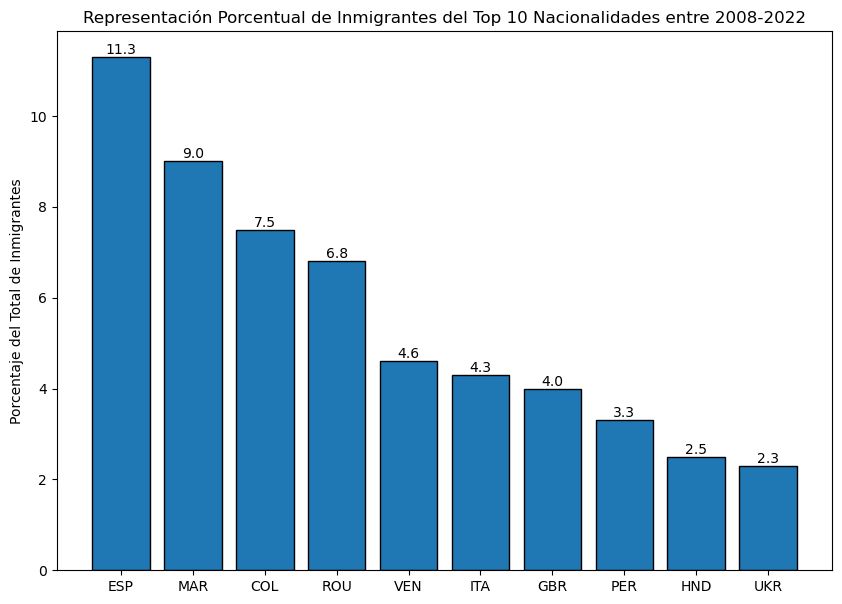

In [55]:
# Total de inmigrantes del top nacionalidades
totales_paises = df[(df["Sex"] == "Both") & (df["Age group"] == "All")].groupby("Nationality code")["Immigrant count"].sum().reset_index()
totales_paises = totales_paises.sort_values("Immigrant count", ascending = False).reset_index(drop = True)

# Calcular porcentaje del top nacionalidades en base al total de inmigrantes del periiodo 2008-2022
total_immi = totales[(totales["Sex"] == "Both") & (totales["Age group"] == "All")]["Immigrant count"].sum()
totales_paises["Immigrant %"] = round(totales_paises["Immigrant count"] / total_immi * 100, 1)

# Graficar representación porcentual del top 10
plt.figure(figsize=(10, 7))
plt.title('Representación Porcentual de Inmigrantes del Top 10 Nacionalidades entre 2008-2022')
plt.ylabel("Porcentaje del Total de Inmigrantes")
barplot_immi = plt.bar(totales_paises['Nationality code'].iloc[:10], totales_paises['Immigrant %'].iloc[:10], ec = "black")
plt.bar_label(barplot_immi, labels = totales_paises['Immigrant %'].iloc[:10], label_type = "edge")
plt.show()

*Observaciones:*
- Previamente, ya habíamos notado la cantidad de inmigrantes españoles, colombianos, marroquíes y rumanos, y ahora lo observamos también en su distribución porcentual en base al total.
- Luego de los top 4, parece variación porcentual menor entre las subsiguientes nacionalidades.

**Top 5 Nacionalidades: Comparación de la Variación del Número de Inmigrantes en el Tiempo** 

In [56]:
top5 = ['ESP', 'MAR', 'COL', 'ROU', 'VEN']
df_top5 = df[(df["Sex"] == "Both") & (df["Age group"] == "All")]
df_top5 = df_top5[(df_top5["Nationality code"].isin(top5))]

# Graficar cambio de imigracion en el tiempo para el top5 nacionalidades
alt.Chart(df_top5, height = 450, width = 750)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = 'Immigrant count',
                    color = 'Nationality code',
                    tooltip =["Year", "Nationality code", 'Immigrant count'])\
            .properties(title="Top 5 Nacionalidades: Cambio en el Tiempo del Número de Inmigrantes")


alt.Chart(...)

Observamos que, previo a la pandemia (2008-2019), las distintas nacionalidades en el top 5 presentan presentan diferencias notables. Por ejemplo, los inmigrantes colombianos y venezolanos entán en un rango medio/bajo durante 2008-2015, pero a partir del 2016 su número comienza a aumentar drásticamente. Incluso podemos ver como los colombianos se convierten en la nacionalidad con el mayor número de inmigrantes en el 2022 (post-pandemia). 

Así mismo, vemos como los rumanos presentan un descenso a partir del 2012 y el número de inmigrantes se estabiliza. Por otro lado, en cuento a crecimiento, el incremento de españoles es similar a venezolanos y marroquies a partir del 2012, pero vemos que su número incrementa a un ritmo diferente.

Estos datos indican que las condiciones específicas de cada nación, o nación de origen, del inmigrante tiene un efecto importante a tener en cuenta.

**Número de Inmigrantes Según Sexo a lo largo del Tiempo**

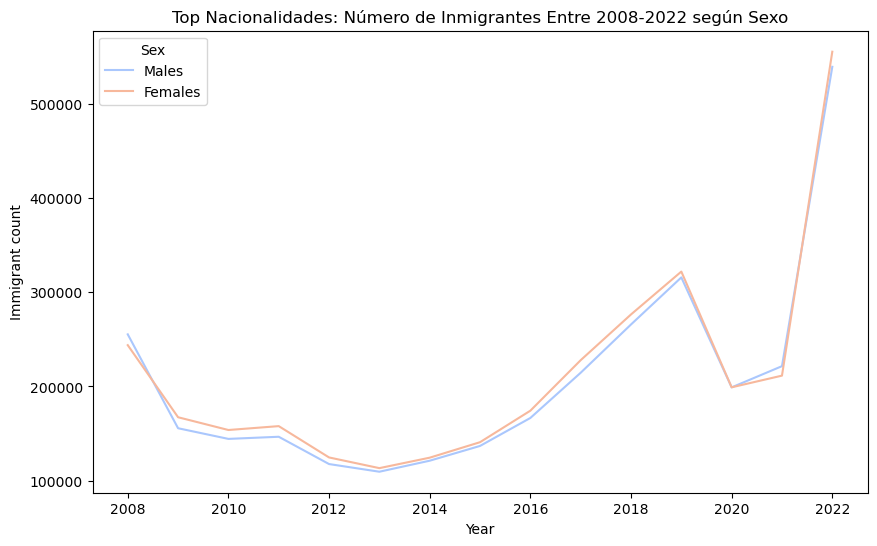

In [57]:
# Filrar, agrupar por año/sexo y obtener suma total
data_por_sexo = df[(df['Sex'] != 'Both') & (df["Age group"] != "All")].groupby(['Year', 'Sex'])['Immigrant count'].sum().reset_index()

# Graficar cantidad de inmigrantes hombres y mujeres desde 2008 hasta 2022
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_por_sexo.sort_values('Sex', ascending = False), x='Year', y='Immigrant count', hue='Sex', palette = "coolwarm")
plt.title('Top Nacionalidades: Número de Inmigrantes Entre 2008-2022 según Sexo')
plt.show()

La cantidad total de inmigrantes hombres y mujeres de nuestras top nacionalidades es muy similar a lo largo de los años, siendo, en la mayoría de los casos, la cantidad de hombres levemente inferior a la de las mujeres (particularmente notable en el intervalo 2009-2011), con excepción de los años 2008 y 2021. 

**Distribución de Inmigrantes por Grupo de Edad según el Año**

In [29]:
# Filtrar, agrupar y sumar inmigrantes según año y grupo de edad
edad_por_año = df[(df['Age group'] != 'All') & (df['Sex'] != 'Both')].groupby(['Year', 'Age group'])['Immigrant count'].sum().reset_index()

# Graficar cantidad total de inmigrantes por grupo de edad en cada año
alt.Chart(edad_por_año, height = 250, width = 270).mark_bar()\
    .encode(
    x= alt.X('Age group:O', axis=alt.Axis(labelAngle=-360)),
    y='Immigrant count:Q',
    color='Age group:N',
    column='Year:N',
    tooltip=["Age group","Immigrant count"])\
    .properties(title="Top Nacionalidades: Número de Inmigrantes por Año según el Grupo de Edad")

alt.Chart(...)

*Observaciones:*

- Entre el 2008-2021, vemos un aumento progresivo de cantidad de inmigrantes hasta los 34 años, siendo el grupo 0-14 años < 15-24 años < 25-34 años. Y a partir de esos grupos, hay una caída progresiva en la cantidad de inmigrantes, similar a lo que observamos previamente en nuestro análisis de sumatoria de totales,siendo la cantidad de inmigrantes del grupo 35-44 años > 45-54 años > 55-64 años > 65+ años.
- Únicamente en el 2022 se observa un cambio en la tendencia, teniendo que el grupo de 15-24 años presenta una cantidad de inmigrantes menor a la del grupo 0-14 años y el grupo de 35-34 supera en cantidad a ambos.
- Los tres grupos de mayor edad (45-54 años, 55-64 años y 65+) que tienen, además, la menor cantidad de inmigrantes, son también los que presentan una menor variación en el número total de inmigrantes a lo largo de los años, con excepción del año 2022, contrario a lo que sucede con los grupos con mayor número de inmigrantes.

**Comparación de Algunos Estadísticos Descriptivos entre 2008-2022**

Como nuestros datos son valores totales segregados, nos enfocaremos en analizar el cambio de los valors mínimos, máximos, media y mediana de inmigración en el tiempo.

In [30]:
# Estadísticos descriptivos por año
stats = df[(df["Sex"] == "Both") & (df["Age group"] == "All")].groupby(["Year"])["Immigrant count"].agg([min, max, 'mean', 'median']).reset_index()

# Renombrar columnas
stats.rename(columns={'min': 'Mínimo', 'max': 'Máximo', 'mean': 'Media', 'median': 'Mediana'}, inplace = True)

# Convertir columna "Year" en índice
stats.set_index("Year", inplace=True)

# Apilar estadísticos en variable "Stat" y renombrar columnas nuevamente
stats = stats.stack().to_frame().reset_index()
stats.rename(columns={'level_1': 'Stat', 0: 'Valor'}, inplace = True)

# Pasar columna "Valor" a entero
stats.Valor = stats.Valor.astype(int)

# Ver tabla
stats.head(10)

,Year,Stat,Valor
0,2008,Mínimo,2893
1,2008,Máximo,71761
2,2008,Media,18487
3,2008,Mediana,13363
4,2009,Mínimo,2354
5,2009,Máximo,44079
6,2009,Media,11957
7,2009,Mediana,7885
8,2010,Mínimo,2966
9,2010,Máximo,51915


In [31]:
# Graficar cambio de estadísticos en el tiempo
alt.Chart(stats, height = 500, width = 800)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = alt.Y("Valor", title = 'Immigrant count'),
                    color = "Stat",
                    tooltip =["Year", "Stat", "Valor"])\
            .properties(title="Top Nacionalidades: Cambio en el Tiempo de Algunos Estadísticos Descriptivos para el Número de Inmigrantes")

alt.Chart(...)

In [32]:
# Estimar desviación estándar por año
df[(df["Sex"] == "Both") & (df["Age group"] == "All")].groupby(["Year"])["Immigrant count"].agg(['std']).reset_index().astype(int)

,Year,std
0,2008,16629
1,2009,10706
2,2010,10681
3,2011,10591
4,2012,7280
5,2013,6915
6,2014,8640
7,2015,10394
8,2016,12431
9,2017,15982


A través del gráfico, se aprecia que hay una gran distancia entre los valores máximos de cada año en relación al mínimo, media y mediana, reflejándose también de esta forma el sesgo de los datos hacia izquierda. Adicionalmente, notamos que el máximo valor de inmigración también varía más a tarvés de los años que el resto de las medidas. 

Además, si nos fijamos en la evolución de la mediana en nuestras 27 top nacionalidades en relación a la media y máximo, se puede inferir que hay hay un pequeño grupo de nacionalidades que congregan gran cantidad de inmigrantes, y esto lo apreciamos previamente al observar lso gráficos de cajas y como españoles, colombianos, marroquíes y rumanos engloban, en conjunto, un poco más del 30% del total de inmigrantes durante el período 2008-2022. Así, tenemos que, principalmente, el top 5 de nacionalidades de cada año son los responsables de la dispersión de los datos (observar valores de desviación estándar por año, los cuales son cercanos o, en algunos casos, superiores al valor de la media).

Si hacemos el mismo análisis en base al sexo, tendríamos:

In [33]:
# Estadísticos descriptivos por año según el sexo
stats_sex = df[(df["Sex"] != "Both") & (df["Age group"] == "All")].groupby(["Year", "Sex"])["Immigrant count"].agg([min, max, 'mean', 'median']).reset_index()

# Renombrar columnas
stats_sex.rename(columns={'min': 'Mínimo', 'max': 'Máximo', 'mean': 'Media', 'median': 'Mediana'}, inplace = True)

# Convertir columna "Year" y "Sex" en índice
stats_sex.set_index(["Year", "Sex"], inplace = True)

# Apilar estadísticos en variable "Stat" y renombrar columnas nuevamente
stats_sex = stats_sex.stack().to_frame().reset_index()
stats_sex.rename(columns={'level_2': 'Stat', 0: 'Valor'}, inplace = True)

# Pasar columna "Valor" a entero
stats_sex.Valor = stats_sex.Valor.astype(int)

# Graficar cambio de estadísticos en el tiempo
alt.Chart(stats_sex, height = 300, width = 600)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = alt.Y("Valor", title = 'Immigrant count'),
                    color = "Stat",
                    column = "Sex",
                    tooltip =["Year", "Stat", "Valor"])\
            .properties(title="Top Nacionalidades: Cambio en el Tiempo de Algunos Estadísticos Descriptivos Según el Sexo")

alt.Chart(...)

En cuanto el sexo, previamente habíamos observado que la tendencia de mujeres y hombres es similar, y ahora lo evidenciamos nuevamente. Los únicos valores que resaltan son la diferencia entre los máximos del 2008, en donde hay una una diferencia de aproximadamente +10,000 inmigrantes hombres en relación a mujeres, y en el 2022 en donde alrededor de +12,000 mujeres en relación a hombres.

Pasando a los grupos de edades:

In [34]:
# Estadísticos descriptivos por año según el grupo de edad
stats_age = df[(df["Sex"] == "Both") & (df["Age group"] != "All")].groupby(["Year", "Age group"])["Immigrant count"].agg([min, max, 'mean', 'median']).reset_index()

# Renombrar columnas
stats_age.rename(columns={'min': 'Mínimo', 'max': 'Máximo', 'mean': 'Media', 'median': 'Mediana'}, inplace = True)

# Convertir columna "Year" y "Age group" en índice
stats_age.set_index(["Year", "Age group"], inplace = True)

# Apilar estadísticos en variable "Stat" y renombrar columnas nuevamente
stats_age = stats_age.stack().to_frame().reset_index()
stats_age.rename(columns={'level_2': 'Stat', 0: 'Valor'}, inplace = True)

# Pasar columna "Valor" a entero
stats_age.Valor = stats_age.Valor.astype(int)

# Graficar cambio de estadísticos en el tiempo
alt.Chart(stats_age, height = 250, width = 500)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = alt.Y("Valor", title = 'Immigrant count'),
                    color = "Stat",
                    column = "Age group",
                    tooltip =["Year", "Stat", "Valor"])\
            .properties(title="Top Nacionalidades: Cambio en el Tiempo de Algunos Estadísticos Descriptivos Según el Grupo de Edad")

alt.Chart(...)

En cuanto a los grupos edades, vemos un comportamiento similar de los estadísticos descriptivos al observado previamente. Resalta la cercanía entre el mínimo, media y mediana para los grupos de mayor edad a partir de 35 años y que el cambio de los valores máximos dentro se esos grupos presenta una pendiente más suave que los grupos más jovenes (por debajo de 35 años). 

También observamos que hay mucha similitud entre la mediana y media de los tres grupos más jóvenes (0-14, 15-24 y 25-34). Nuevamente, este es otro indicio del impacto del grupo de valores extremos de un pequeño número de nacionalidades.

#### *Eliminar Nacionalidad Española*

Ya que que nuestro análisis está orientado al país de los inmigrantes y agregaremos variables/datos de dichos países, debemos remover a los españoles debido a que, en ese caso particular, nos interesa saber el país de origen de los inmigrantes con nacionalidad española, de lo contrario, estaríamos asociando datos de españa a los inmigrantes.

*Nota: Posteriormente evaluaremos el estudio de un modelo específico para españoles inmigrantes en base a su país de origen*

In [35]:
# Filtrar nacionalidades distintas a ESP
top_inmigracion_2008_2022 = df.loc[df['Nationality code'] != 'ESP']
top_inmigracion_2008_2022

,Year,Nationality code,Sex,Age group,Immigrant count
0,2008,DZA,Both,0 - 14,759
1,2008,PER,Males,35 - 44,2938
2,2008,PER,Males,45 - 54,1128
3,2008,PER,Males,55 - 64,265
4,2008,PER,Males,65+,156
...,...,...,...,...,...
9715,2022,PAK,Males,55 - 64,330
9716,2022,PAK,Females,55 - 64,146
9717,2022,PAK,Both,65+,169
9718,2022,PAK,Males,65+,99


In [36]:
# Exportar datos de tasa de homicidios como csv
top_inmigracion_2008_2022.to_csv("../13 - Exports (preprocesamiento)/top_inmigracion_2008_2022.csv", index = False)

### ETAPA 2: PREPROCESAMIENTO DE DATOS PARA LAS VARIABLES EXPLICATIVAS

#### *Indices de Desarrollo*

A través de los índices de desarrollo socio-económicos se busca considerar y analizar el impacto de la condición de vida de los países sobre el incremento o disminución de la inmigración a España.

*Nota: Los datos se extraen principalmente del Banco Mundial y el Fondo Monetario Internacional. Links:* 
- https://databank.worldbank.org/GDP---Inflation---Country-Risk/id/ae8fd58a#   
- https://www.worldbank.org/en/research/brief/inflation-database
- https://www.imf.org/external/datamapper/NGDP_RPCH@WEO/OEMDC/ADVEC/WEOWORLD/VEN

In [37]:
# Lectura y visualización de dataset "24287" 
indices_desarrollo_ini = pd.read_csv(
            "../5- Indices de Desarrolo/87f75e78-f12c-4ad6-9b99-d2b5adf9caa7_Data.csv",
            delimiter = ",",
            decimal = ".",
            thousands= ',',
            na_values= ['..']
)

# Motrar información básica del dataset y primer vistazo de los datos
indices_desarrollo_ini.info()
indices_desarrollo_ini

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9049 entries, 0 to 9048
Data columns (total 13 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Time                                                                                              9046 non-null   object 
 1   Time Code                                                                                         9044 non-null   object 
 2   Country Name                                                                                      9044 non-null   object 
 3   Country Code                                                                                      9044 non-null   object 
 4   GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                                         8064 non-null   float64
 5  

,Time,Time Code,Country Name,Country Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]",Political Stability and Absence of Violence/Terrorism: Percentile Rank [PV.PER.RNK],"Probability of dying among youth ages 20-24 years (per 1,000) [SH.DYN.2024]",Regulatory Quality: Percentile Rank [RQ.PER.RNK],Rule of Law: Percentile Rank [RL.PER.RNK],Voice and Accountability: Percentile Rank [VA.PER.RNK],"Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]"
0,1990,YR1990,Australia,AUS,3.579123,NaN,6.092179,NaN,4.5,NaN,NaN,NaN,NaN
1,1990,YR1990,Indonesia,IDN,7.224335,NaN,9.112057,NaN,6.1,NaN,NaN,NaN,NaN
2,1990,YR1990,India,IND,5.533455,NaN,10.668304,NaN,14.5,NaN,NaN,NaN,NaN
3,1990,YR1990,Japan,JPN,4.840929,NaN,2.564404,NaN,2.7,NaN,NaN,NaN,NaN
4,1990,YR1990,"Korea, Rep.",KOR,9.877553,NaN,10.087466,NaN,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9047,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminamos las ultimas 5 filas que corresponden a un pie de página.

In [38]:
# Hacer una copia del dataframe
indices_desarrollo = indices_desarrollo_ini.copy()

# Eliminar últimas 5 filas del dataframe
indices_desarrollo.drop(indices_desarrollo.index[len(indices_desarrollo)-5:], inplace = True)

indices_desarrollo

,Time,Time Code,Country Name,Country Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]",Political Stability and Absence of Violence/Terrorism: Percentile Rank [PV.PER.RNK],"Probability of dying among youth ages 20-24 years (per 1,000) [SH.DYN.2024]",Regulatory Quality: Percentile Rank [RQ.PER.RNK],Rule of Law: Percentile Rank [RL.PER.RNK],Voice and Accountability: Percentile Rank [VA.PER.RNK],"Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]"
0,1990,YR1990,Australia,AUS,3.579123,NaN,6.092179,NaN,4.5,NaN,NaN,NaN,NaN
1,1990,YR1990,Indonesia,IDN,7.224335,NaN,9.112057,NaN,6.1,NaN,NaN,NaN,NaN
2,1990,YR1990,India,IND,5.533455,NaN,10.668304,NaN,14.5,NaN,NaN,NaN,NaN
3,1990,YR1990,Japan,JPN,4.840929,NaN,2.564404,NaN,2.7,NaN,NaN,NaN,NaN
4,1990,YR1990,"Korea, Rep.",KOR,9.877553,NaN,10.087466,NaN,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9039,2023,YR2023,Sub-Saharan Africa,SSF,NaN,6.235160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9040,2023,YR2023,Sub-Saharan Africa (excluding high income),SSA,NaN,6.235160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9041,2023,YR2023,Sub-Saharan Africa (IDA & IBRD countries),TSS,NaN,6.235160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9042,2023,YR2023,Upper middle income,UMC,NaN,5.461494,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filtremos los datos para el rango de años 2008-2022 y nuestros países de interés. 

In [39]:
# Obtener listas de años y códigos de paises según el top nacionalidades
years = df['Year'].unique().tolist()
country_codes = df['Nationality code'].unique().tolist() 

# Cambiamos el tipo de datos de los años a entero
indices_desarrollo['Time'] = indices_desarrollo['Time'].astype(int)

# Filtramos el conjunto de datos
indices_desarrollo = indices_desarrollo[indices_desarrollo['Time'].isin(years)]
indices_desarrollo = indices_desarrollo[indices_desarrollo['Country Code'].isin(country_codes)]

indices_desarrollo

,Time,Time Code,Country Name,Country Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]",Political Stability and Absence of Violence/Terrorism: Percentile Rank [PV.PER.RNK],"Probability of dying among youth ages 20-24 years (per 1,000) [SH.DYN.2024]",Regulatory Quality: Percentile Rank [RQ.PER.RNK],Rule of Law: Percentile Rank [RL.PER.RNK],Voice and Accountability: Percentile Rank [VA.PER.RNK],"Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]"
4803,2008,YR2008,Algeria,DZA,2.400000,11.33,15.310581,14.903846,3.7,29.126213,24.519230,20.673077,67.407508
4808,2008,YR2008,Argentina,ARG,4.057233,7.84,23.171165,40.865383,4.8,24.757282,27.884615,58.173077,76.317176
4825,2008,YR2008,Brazil,BRA,5.094195,8.27,8.778553,33.653847,8.1,54.368931,46.634617,63.942307,66.279495
4828,2008,YR2008,Bulgaria,BGR,6.129559,5.61,8.103456,56.250000,3.7,73.300972,51.923077,65.865387,87.598015
4840,2008,YR2008,China,CHN,9.650679,4.59,7.795346,29.326923,2.9,48.543690,37.980770,5.769231,45.964157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,2022,YR2022,Spain,ESP,5.770648,12.92,4.142323,53.301888,1.5,75.943398,77.358490,79.710144,84.660609
8716,2022,YR2022,Ukraine,UKR,-29.100000,NaN,34.320712,5.660378,18.1,40.566036,18.867924,45.893719,NaN
8718,2022,YR2022,United Kingdom,GBR,4.346561,3.73,5.152902,62.264153,1.7,93.396225,89.150940,89.371979,84.328483
8719,2022,YR2022,United States,USA,1.935635,3.65,7.040723,45.283020,6.2,91.037735,88.679245,72.946861,93.716423


Eliminamos las columnas que no necesitamos y renombramos las restantes.

In [40]:
# Remover Time Code y Country Name
indices_desarrollo.drop(['Time Code', 'Country Name'], axis = 1, inplace = True)

# Renombrar
indices_desarrollo = indices_desarrollo.rename(columns={'Time':'Year', 
                                                        'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]' : 'GDP growth', 
                                                        'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]' : 'Unemployment %', 
                                                        'Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]' : 'Inflation annual', 
                                                        'Political Stability and Absence of Violence/Terrorism: Percentile Rank [PV.PER.RNK]' : 'Political and Violence Percentile',
                                                        'Probability of dying among youth ages 20-24 years (per 1,000) [SH.DYN.2024]' : 'Probability of dying young',
                                                        'Regulatory Quality: Percentile Rank [RQ.PER.RNK]' : 'Regulatory Quality Percentile',
                                                        'Rule of Law: Percentile Rank [RL.PER.RNK]' : 'Rule of Law Percentile',
                                                        'Voice and Accountability: Percentile Rank [VA.PER.RNK]' : 'Voice and Accountability Percentile',
                                                        'Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]' : 'Salaried workers %'
                                                        })

indices_desarrollo

,Year,Country Code,GDP growth,Unemployment %,Inflation annual,Political and Violence Percentile,Probability of dying young,Regulatory Quality Percentile,Rule of Law Percentile,Voice and Accountability Percentile,Salaried workers %
4803,2008,DZA,2.400000,11.33,15.310581,14.903846,3.7,29.126213,24.519230,20.673077,67.407508
4808,2008,ARG,4.057233,7.84,23.171165,40.865383,4.8,24.757282,27.884615,58.173077,76.317176
4825,2008,BRA,5.094195,8.27,8.778553,33.653847,8.1,54.368931,46.634617,63.942307,66.279495
4828,2008,BGR,6.129559,5.61,8.103456,56.250000,3.7,73.300972,51.923077,65.865387,87.598015
4840,2008,CHN,9.650679,4.59,7.795346,29.326923,2.9,48.543690,37.980770,5.769231,45.964157
...,...,...,...,...,...,...,...,...,...,...,...
8693,2022,ESP,5.770648,12.92,4.142323,53.301888,1.5,75.943398,77.358490,79.710144,84.660609
8716,2022,UKR,-29.100000,NaN,34.320712,5.660378,18.1,40.566036,18.867924,45.893719,NaN
8718,2022,GBR,4.346561,3.73,5.152902,62.264153,1.7,93.396225,89.150940,89.371979,84.328483
8719,2022,USA,1.935635,3.65,7.040723,45.283020,6.2,91.037735,88.679245,72.946861,93.716423


Ahora evaluamos la cantidad de nulos.

In [41]:
# Datos nulos por columna
print ('\033[1m' + 'Datos nulos por columna:\n' + '\033[0m', indices_desarrollo.isnull().sum())

# Datos nulos totales
print ('\033[1m' + '\nTotal datos nulos:' + '\033[0m', indices_desarrollo.isnull().sum().sum())

Datos nulos por columna:
 Year                                   0
Country Code                           0
GDP growth                             8
Unemployment %                         1
Inflation annual                       8
Political and Violence Percentile      0
Probability of dying young             0
Regulatory Quality Percentile          0
Rule of Law Percentile                 0
Voice and Accountability Percentile    0
Salaried workers %                     1
dtype: int64

Total datos nulos: 18


Si filtramos los 8 datos nulos de la variable "GDP growth" y "Inflation annual", observamos que corresponden a datos que faltan para Venezuela.

In [42]:
# Filtrar y mostrar datos nulos 'GDP growth'
indices_desarrollo.loc[indices_desarrollo['GDP growth'].isnull()]

,Year,Country Code,GDP growth,Unemployment %,Inflation annual,Political and Violence Percentile,Probability of dying young,Regulatory Quality Percentile,Rule of Law Percentile,Voice and Accountability Percentile,Salaried workers %
6861,2015,VEN,NaN,6.085,NaN,16.190475,15.6,2.380952,0.476190,19.704433,65.080931
7127,2016,VEN,NaN,5.320,NaN,13.809524,15.6,2.380952,0.476190,17.241379,64.824659
7393,2017,VEN,NaN,5.050,NaN,10.952381,15.8,2.380952,0.476190,14.285714,64.129845
7659,2018,VEN,NaN,5.512,NaN,9.433962,15.7,0.000000,0.476190,10.194175,62.889918
7925,2019,VEN,NaN,5.923,NaN,8.490566,15.3,0.476190,0.476190,9.661836,60.467218
8191,2020,VEN,NaN,7.530,NaN,8.490566,15.4,0.476190,0.000000,7.246377,59.363579
8457,2021,VEN,NaN,7.133,NaN,9.433962,15.4,0.952381,0.000000,5.797101,59.593844
8723,2022,VEN,NaN,5.620,NaN,12.264151,15.5,2.358490,0.471698,6.763285,59.850532


Sin embargo, se obtuvieron estos datos a partir de una base de datos del Fondo Monetario Internacional (FMI) y un conjunto de datos específico de inflación del Banco Mundial; ambos tendremos que preprocesarlos previamente para extraer los datos de Venezuela que necesitamos.

In [43]:
# Cargar datos de GDP del FMI 
fmi_gdp = pd.read_csv("../5- Indices de Desarrolo/imf-dm-export-20240717.csv",
            decimal = ".",
            thousands= ','
)

fmi_gdp

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Venezuela,-4.9,-1.3,2.6,-9.9,5.2,0.9,6.1,4.8,6.5,...,-30.0,1.0,8.0,4.0,4.0,3.0,no data,no data,no data,no data
2,Advanced economies,1.3,1.9,0.3,3.2,4.9,3.7,3.3,3.8,4.8,...,-3.9,5.7,2.6,1.6,1.7,1.8,1.8,1.7,1.7,1.7
3,Emerging market and developing economies,3.7,2.2,1.5,1.7,4.1,3.5,4.2,4.0,4.5,...,-1.8,7.0,4.1,4.3,4.2,4.2,4.1,4,3.9,3.9
4,World,2.2,2.0,0.7,2.6,4.6,3.6,3.6,3.9,4.7,...,-2.7,6.5,3.5,3.2,3.2,3.2,3.2,3.1,3.1,3.1
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"©IMF, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Convertir columna "Real GDP growth (Annual percent change)" en índice
fmi_gdp.set_index("Real GDP growth (Annual percent change)", inplace=True)

# Apilar datos y renombrar columnas
fmi_gdp = fmi_gdp.stack().to_frame().reset_index()
fmi_gdp.rename(columns={"Real GDP growth (Annual percent change)": 'Country Code', 'level_1': 'Year', 0: 'GDP growth'}, inplace = True)

# Remplazar el país por su código ISO
fmi_gdp['Country Code'].replace('Venezuela', 'VEN', inplace = True)

# Filtrar Venezuela y años 2015-2022 (datos que necesitamos)
fmi_gdp = fmi_gdp[(fmi_gdp['Country Code'] == 'VEN') & (fmi_gdp['Year'].str.contains('2015|2016|2017|2018|2019|2020|2021|2022'))]

# Cambiar datatypes de años y PBI
fmi_gdp = fmi_gdp.astype({'Year': 'int32', 'GDP growth': float})

# Mostrar y verificar
fmi_gdp.info()
fmi_gdp

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 35 to 42
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  8 non-null      object 
 1   Year          8 non-null      int32  
 2   GDP growth    8 non-null      float64
dtypes: float64(1), int32(1), object(1)
memory usage: 224.0+ bytes


,Country Code,Year,GDP growth
35,VEN,2015,-6.2
36,VEN,2016,-17.0
37,VEN,2017,-15.7
38,VEN,2018,-19.7
39,VEN,2019,-27.7
40,VEN,2020,-30.0
41,VEN,2021,1.0
42,VEN,2022,8.0


Ahora unimos los datos en el dataset *indices_desarrollo* para sustituir los valores nulos.

In [45]:
# Completar los valores nulos faltantes con los datos de fmi_gdp: unir datasets, crear columna con la union de los datos de GDP y eliminar columnas resultantes de la unión
indices_desarrollo = indices_desarrollo.merge(fmi_gdp, on = ['Year', 'Country Code'], how = 'left')\
                                        .assign(GDP_growth = lambda x: x['GDP growth_x'].fillna(x['GDP growth_y']))\
                                        .drop(columns = ['GDP growth_y', 'GDP growth_x'])

# Verificar correcta inclusión de los datos faltantes
indices_desarrollo.loc[indices_desarrollo['Country Code'] == 'VEN'].tail(10)

,Year,Country Code,Unemployment %,Inflation annual,Political and Violence Percentile,Probability of dying young,Regulatory Quality Percentile,Rule of Law Percentile,Voice and Accountability Percentile,Salaried workers %,GDP_growth
161,2013,VEN,7.540,35.502675,16.587677,15.0,4.739336,0.938967,22.065727,64.876094,1.343094
188,2014,VEN,6.798,40.440490,18.095238,15.4,2.884615,0.480769,19.704433,64.967602,-3.894386
215,2015,VEN,6.085,NaN,16.190475,15.6,2.380952,0.476190,19.704433,65.080931,-6.200000
242,2016,VEN,5.320,NaN,13.809524,15.6,2.380952,0.476190,17.241379,64.824659,-17.000000
269,2017,VEN,5.050,NaN,10.952381,15.8,2.380952,0.476190,14.285714,64.129845,-15.700000
296,2018,VEN,5.512,NaN,9.433962,15.7,0.000000,0.476190,10.194175,62.889918,-19.700000
323,2019,VEN,5.923,NaN,8.490566,15.3,0.476190,0.476190,9.661836,60.467218,-27.700000
350,2020,VEN,7.530,NaN,8.490566,15.4,0.476190,0.000000,7.246377,59.363579,-30.000000
377,2021,VEN,7.133,NaN,9.433962,15.4,0.952381,0.000000,5.797101,59.593844,1.000000
404,2022,VEN,5.620,NaN,12.264151,15.5,2.358490,0.471698,6.763285,59.850532,8.000000


Ahora pasamos a extraer los datos faltantes de Venezuela para "Inflation annual".

In [46]:
# Cargar datos de Inflación global/anual del banco mundial
wb_inflation_def = pd.read_excel("../5- Indices de Desarrolo/Inflation-data.xlsx",
            decimal = ".",
            thousands= ',',
            sheet_name='def_a'
)

wb_inflation_def

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,314.0,Aruba,Rate,GDP deflator Index growth rate,6.477990,-5.096859,-2.252045,25.280492,1.390775,...,1.770147,2.044462,-1.765266,-1.487145,3.960441,2.083505,-1.338559,2.216017,2.224367,5.475071
1,AFG,512.0,Afghanistan,Rate,GDP deflator Index growth rate,NaN,NaN,NaN,NaN,NaN,...,3.146831,2.665090,-2.409509,2.404000,2.071208,6.520928,5.307120,0.524517,5.475071,NaN
2,AGO,614.0,Angola,Rate,GDP deflator Index growth rate,NaN,NaN,NaN,NaN,NaN,...,3.560823,-3.518390,21.774300,22.617828,33.762011,22.929155,15.022316,33.618592,41.387279,13.398002
3,ALB,914.0,Albania,Rate,GDP deflator Index growth rate,NaN,NaN,NaN,NaN,NaN,...,1.549888,0.564278,-0.632405,1.450936,1.359464,0.363417,1.413396,5.928014,9.651763,5.194269
4,AND,NaN,Andorra,Rate,GDP deflator Index growth rate,NaN,7.845871,8.518078,11.849434,15.945201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.095592,4.940613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,ZAF,199.0,South Africa,Rate,GDP deflator Index growth rate,4.287668,6.006722,11.055103,18.413637,15.935298,...,5.546597,5.170767,7.206089,5.267838,3.916757,4.020749,5.286303,6.219017,4.811124,4.445083
194,ZMB,754.0,Zambia,Rate,GDP deflator Index growth rate,2.599970,6.042913,5.059905,6.463870,8.095218,...,5.435841,6.660608,13.552055,10.095929,7.411123,7.633305,17.148598,27.585834,8.739300,6.671777
195,ZWE,698.0,Zimbabwe,Rate,GDP deflator Index growth rate,-12.053144,6.163254,13.453570,20.450656,12.853755,...,-0.252141,0.607814,2.160993,2.442946,5.220227,-4.035235,568.971862,113.294981,113.018434,812.247463
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Convertir columna "Real GDP growth (Annual percent change)" en índice
wb_inflation_def.set_index("Country Code", inplace=True)

# Eliminar columnas que no necesitamos
wb_inflation_def.drop(['IMF Country Code', 'Country', 'Indicator Type', 'Series Name'], axis = 1, inplace = True)

# Apilar datos y renombrar columnas
wb_inflation_def = wb_inflation_def.stack().to_frame().reset_index()
wb_inflation_def.rename(columns={'level_1': 'Year', 0: 'Inflation annual'}, inplace = True)

# Filtrar Venezuela y años 2015-2022 (datos que necesitamos)
wb_inflation_def = wb_inflation_def[(wb_inflation_def['Country Code'] == 'VEN') & (wb_inflation_def['Year'].between(2015, 2022))]

# Mostrar y verificar
wb_inflation_def.info()
wb_inflation_def

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 8972 to 8979
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      8 non-null      object 
 1   Year              8 non-null      int64  
 2   Inflation annual  8 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 256.0+ bytes


,Country Code,Year,Inflation annual
8972,VEN,2015,182.731201
8973,VEN,2016,321.305944
8974,VEN,2017,748.055810
8975,VEN,2018,65374.081840
8976,VEN,2019,19906.024315
8977,VEN,2020,2355.147243
8978,VEN,2021,1221.474536
8979,VEN,2022,1203.151825


Ahora unimos los datos al dataset central de indices para completar los datos nulos de Venezuela.

In [48]:
# Completar los valores null faltantes con los datos de fmi_gdp: unir datasets, crear columna con la union de los datos de inflación y eliminar columnas resultantes de la unión
indices_desarrollo = indices_desarrollo.merge(wb_inflation_def, on = ['Year', 'Country Code'], how = 'left')\
                                       .assign(Inflation_annual = lambda x: x['Inflation annual_x'].fillna(x['Inflation annual_y']))\
                                       .drop(columns=['Inflation annual_y', 'Inflation annual_x'])

# Verificar correcta inclusión de los datos faltantes
indices_desarrollo.loc[indices_desarrollo['Country Code'] == 'VEN'].tail(10)

,Year,Country Code,Unemployment %,Political and Violence Percentile,Probability of dying young,Regulatory Quality Percentile,Rule of Law Percentile,Voice and Accountability Percentile,Salaried workers %,GDP_growth,Inflation_annual
161,2013,VEN,7.540,16.587677,15.0,4.739336,0.938967,22.065727,64.876094,1.343094,35.502675
188,2014,VEN,6.798,18.095238,15.4,2.884615,0.480769,19.704433,64.967602,-3.894386,40.440490
215,2015,VEN,6.085,16.190475,15.6,2.380952,0.476190,19.704433,65.080931,-6.200000,182.731201
242,2016,VEN,5.320,13.809524,15.6,2.380952,0.476190,17.241379,64.824659,-17.000000,321.305944
269,2017,VEN,5.050,10.952381,15.8,2.380952,0.476190,14.285714,64.129845,-15.700000,748.055810
296,2018,VEN,5.512,9.433962,15.7,0.000000,0.476190,10.194175,62.889918,-19.700000,65374.081840
323,2019,VEN,5.923,8.490566,15.3,0.476190,0.476190,9.661836,60.467218,-27.700000,19906.024315
350,2020,VEN,7.530,8.490566,15.4,0.476190,0.000000,7.246377,59.363579,-30.000000,2355.147243
377,2021,VEN,7.133,9.433962,15.4,0.952381,0.000000,5.797101,59.593844,1.000000,1221.474536
404,2022,VEN,5.620,12.264151,15.5,2.358490,0.471698,6.763285,59.850532,8.000000,1203.151825


Continuando con los datos nulos, si evaluamos los restantes, vemos que ambos pertenecen a Ukrania:

In [49]:
# Filtrar y mostrar datos nulos de desempleo
indices_desarrollo.loc[indices_desarrollo['Unemployment %'].isnull()]

,Year,Country Code,Unemployment %,Political and Violence Percentile,Probability of dying young,Regulatory Quality Percentile,Rule of Law Percentile,Voice and Accountability Percentile,Salaried workers %,GDP_growth,Inflation_annual
401,2022,UKR,NaN,5.660378,18.1,40.566036,18.867924,45.893719,NaN,-29.1,34.320712


Segun el Banco Nacional de Ukrania (October 2022), la tasa de desempleo de Ukrania en el 2022 fue de 33.3%.

In [50]:
# Remplazar dato nulo de desempleo de Ukrania por el valor correcto
indices_desarrollo['Unemployment %'].fillna(33.3, inplace = True)

# Verificar cambio
indices_desarrollo.loc[indices_desarrollo['Country Code'] == 'UKR'].tail()

,Year,Country Code,Unemployment %,Political and Violence Percentile,Probability of dying young,Regulatory Quality Percentile,Rule of Law Percentile,Voice and Accountability Percentile,Salaried workers %,GDP_growth,Inflation_annual
293,2018,UKR,8.80,5.660378,3.8,43.333332,23.809525,43.689320,83.017562,3.488362,15.398530
320,2019,UKR,8.19,8.962264,3.7,44.761906,24.761906,46.859905,82.358734,3.199504,8.246226
347,2020,UKR,9.48,12.264151,3.7,42.380951,25.238094,51.690823,82.268576,-3.752804,10.294944
374,2021,UKR,9.83,12.735849,3.9,42.380951,25.714285,49.275364,82.364532,3.445626,24.804751
401,2022,UKR,33.30,5.660378,18.1,40.566036,18.867924,45.893719,NaN,-29.100000,34.320712


Ahora imputemos el dato nulo "Salaried workers %" con la media debido a que observamos la variación del valor en los años.

In [51]:
# Imputar dato nulo con la media del Ukrania
indices_desarrollo['Salaried workers %'] = indices_desarrollo['Salaried workers %'].fillna(indices_desarrollo.groupby(['Country Code'])['Salaried workers %'].transform('mean'))

# Verificar cambio
indices_desarrollo.loc[indices_desarrollo['Country Code'] == 'UKR'].tail()

,Year,Country Code,Unemployment %,Political and Violence Percentile,Probability of dying young,Regulatory Quality Percentile,Rule of Law Percentile,Voice and Accountability Percentile,Salaried workers %,GDP_growth,Inflation_annual
293,2018,UKR,8.80,5.660378,3.8,43.333332,23.809525,43.689320,83.017562,3.488362,15.398530
320,2019,UKR,8.19,8.962264,3.7,44.761906,24.761906,46.859905,82.358734,3.199504,8.246226
347,2020,UKR,9.48,12.264151,3.7,42.380951,25.238094,51.690823,82.268576,-3.752804,10.294944
374,2021,UKR,9.83,12.735849,3.9,42.380951,25.714285,49.275364,82.364532,3.445626,24.804751
401,2022,UKR,33.30,5.660378,18.1,40.566036,18.867924,45.893719,82.404408,-29.100000,34.320712


Por último, evaluemos nuevamente que hicimos el tratamiento de todos los datos nulos.

In [52]:
# Datos nulos por columna
print ('\033[1m' + 'Datos nulos por columna:\n' + '\033[0m', indices_desarrollo.isnull().sum())

# Datos nulos totales
print ('\033[1m' + '\nTotal datos nulos:' + '\033[0m', indices_desarrollo.isnull().sum().sum())

Datos nulos por columna:
 Year                                   0
Country Code                           0
Unemployment %                         0
Political and Violence Percentile      0
Probability of dying young             0
Regulatory Quality Percentile          0
Rule of Law Percentile                 0
Voice and Accountability Percentile    0
Salaried workers %                     0
GDP_growth                             0
Inflation_annual                       0
dtype: int64

Total datos nulos: 0


Pasemos a un análisis de las variables.

In [53]:
# Evaluar algunos estadísticos descriptivos de las variables
indices_desarrollo.iloc[:, 2:].describe()

,Unemployment %,Political and Violence Percentile,Probability of dying young,Regulatory Quality Percentile,Rule of Law Percentile,Voice and Accountability Percentile,Salaried workers %,GDP_growth,Inflation_annual
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,7.320049,40.355729,4.977778,51.062514,46.169861,50.855337,67.271618,1.915147,232.486373
std,3.952777,20.396348,3.071540,26.643003,26.585179,26.370549,17.865015,5.133622,3395.366879
min,0.420000,0.473934,1.300000,0.000000,0.000000,3.846154,27.506375,-30.000000,-11.161615
25%,4.590000,25.000000,2.700000,32.227489,25.118483,28.078817,51.437373,0.736267,1.503739
50%,6.760000,41.981133,4.500000,48.095238,41.428570,52.112675,68.668624,2.694907,3.579787
75%,9.250000,57.075470,6.800000,73.684212,62.857143,74.647888,84.020816,4.410481,7.667622
max,33.300000,89.150940,18.100000,98.571426,95.734596,96.059113,94.135947,13.417530,65374.081840


Si observamos la relación de la media/desviación estándar y mínimo/máximo, notamos que para todas las variables preseNtan alta dispersión; esto lo vemos en mayor magnitud para la variable económica "Inflation annual", que presenta una dispersión muy alta. Esto nos dice que tenemos países con indices en ambos extremos, tanto niveles bajos como niveles muy altos.

Si observamos la distribución de las variables por año, tendríamos:

In [54]:
# Definir funciones de graficación
def boxplot(datos, variable):
    """
    Función que realiza un boxplot horizontal con la librería Altair 
    a partir de los siguientes parámetros:
    
    - datos: origen de los datos
    - variable (string): variable cuantitativa (ej: 'Unemployment %')
    """
    return alt.Chart(datos, height = 30, width = 280).mark_boxplot()\
            .encode(x = alt.X(f'{variable}:Q', title = None), tooltip=["Nationality code"])\
            .properties(title=f'{variable}')

def hist(datos, variable, bins):
    """
    Función que realiza un histograma con la librería Altair-
    Parámetros:
    
    - datos: origen de los datos
    - variable (str): variable cuantitativa (ej: 'Unemployment %')
    - bins (int): cantidad máxima de grupos para el histograma (ej: 20)
    """
    return alt.Chart(datos, height = 180, width = 280).mark_bar()\
            .encode(x = alt.X(f'{variable}:Q', title = f'{variable}', bin = alt.Bin(maxbins=bins)),
                    y = alt.Y('count()'), tooltip=['count()'])\
            .interactive()

In [55]:
# Gragicar histograma y boxplot de las variables en indices_desarrollo
columnas = indices_desarrollo.iloc[:, 2:].columns

# Renombrar columna de codigo de país para que haga match con el dataset "df" de inmigracion
indices_desarrollo.rename(columns={'Country Code' : 'Nationality code'}, inplace = True)

for col in columnas:
    alt.vconcat(
        boxplot(indices_desarrollo, f'{col}'),
        hist(indices_desarrollo, f'{col}', 30)
    ).display()

    print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

alt.VConcatChart(...)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


alt.VConcatChart(...)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


alt.VConcatChart(...)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


alt.VConcatChart(...)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


alt.VConcatChart(...)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


alt.VConcatChart(...)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


alt.VConcatChart(...)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


alt.VConcatChart(...)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


alt.VConcatChart(...)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


*Observaciones:*
- Los datos de las variables "GDP_Growth" y "Unemployment %" son las que se asemejan más a una distribución normal, pero ambas presentan valores extremos atípicos.
- La inflación anual presenta datos tan dispersos que un histograma sólo puede agruparlos en valores de inflación negativa (desinflación) y valores positivos (aumento de inflación). Nótese que en los gráficos de cajas solo se distinguen los valores atípicos debido al amplio rango en los valores.
- Para "Probability of dying young", la mayorías de los valores están en un rango de probabilidad baja, con algunos datos que muestran una mayor probabilidad, mientras que para "Salaried workers %" predomina un porcentaje medio/alto.
- El resto de las variables no poseen una tendencia clara, sino que presentan grupos con menor o mayor valores a lo largo del rango de los datos.

Veamos como se comportan algunas de las variables en el tiempo para el Top 4 nacionalidades y comparemoslas con la tendencia del flujo migratorio hacia España:

In [56]:
# Filtrar datos de inmigración para el top4 nacionalidades en número de inmigrantes
top4 = ['COL','MAR','VEN','ROU']
df_top4 = df[(df["Sex"] == "Both") & (df["Age group"] == "All")]
df_top4 = df_top4[(df_top4["Nationality code"].isin(top4))]

# Graficar cambio de imigracion en el tiempo para el top4 nacionalidades
alt.Chart(df_top4, height = 400, width = 700)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = 'Immigrant count',
                    color = 'Nationality code',
                    tooltip =["Year", "Nationality code", 'Immigrant count'])\
            .properties(title="Top 4 Nacionalidades: Cambio en el Tiempo del Número de Inmigrantes").display()


# Filtrar dataset de indices de desarrollo con la lista de top4 de nacionalidades definidos en la Etapa 1
indices_desarrollo_top4 = indices_desarrollo[(indices_desarrollo["Nationality code"].isin(top4))]

# Iterar varibales a graficar
for col in ['GDP_growth', 'Rule of Law Percentile', 'Political and Violence Percentile']:
        alt.Chart(indices_desarrollo_top4, height = 400, width = 700)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = f'{col}',
                    color = 'Nationality code',
                    tooltip =["Year", 'Nationality code', f'{col}'])\
            .properties(title=f"Top 4 Nacionalidades: Cambio en el Tiempo de {col}").display()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

*Obervaciones:*
- En los datos de PBI, para Venezuela es evidente la correlacion inversa con la inmigracion, observando que 2013 y 2019 el crecimiento del país. Sin emgargo, dicha relación es de menor magnitud en los otros top países.
- También observamos como, en relación a los percentiles de estado de derecho y estabilidad política/violencia, los países del Top 4 están en los percentiles medios/bajos.
- Es interesante ver que los dos países de América del Sur de Top 4 (Colombia y Venezuela) están en los percentiles más bajos, particularmente a partir del 2017, siendo Venezuela el caso más extremo.
- Nótese también que Rumania mantiene un mejor percentiles en el tiempo y es, además, la nacionalidad que muestra la menor variación en el número de inmigrantes por año. Caso contrario para Colombia, Venezuela y Rumania cuyo número de inmigrantes incrementa significativamente y son, además, los países peor ubicados en los percentiles.

Esto nos muestra que cada país las variables se comportan y relacionan de forma diferente con la inmigración, y que debemos tomar en cuenta esa observación al modelar los datos. Además, esto también deaja en claro la necesidda de incluir más varibles que describan otrostipo características y escenarios que vayan más allá de estos índices de desarrollo.

In [57]:
# Reducir numero de decimales a 2
indices_desarrollo['Unemployment %'] = indices_desarrollo['Unemployment %'].round(decimals=2)
indices_desarrollo['Political and Violence Percentile'] = indices_desarrollo['Political and Violence Percentile'].round(decimals=2)
indices_desarrollo['Probability of dying young'] = indices_desarrollo['Probability of dying young'].round(decimals=2)
indices_desarrollo['Regulatory Quality Percentile'] = indices_desarrollo['Regulatory Quality Percentile'].round(decimals=2)
indices_desarrollo['Rule of Law Percentile'] = indices_desarrollo['Rule of Law Percentile'].round(decimals=2)
indices_desarrollo['Voice and Accountability Percentile'] = indices_desarrollo['Voice and Accountability Percentile'].round(decimals=2)
indices_desarrollo['Salaried workers %'] = indices_desarrollo['Salaried workers %'].round(decimals=2)
indices_desarrollo['Voice and Accountability Percentile'] = indices_desarrollo['Voice and Accountability Percentile'].round(decimals=2)
indices_desarrollo['GDP_growth'] = indices_desarrollo['GDP_growth'].round(decimals=2)
indices_desarrollo['Inflation_annual'] = indices_desarrollo['Inflation_annual'].round(decimals=2)

# Exportar datos de indices de desarollo como csv
indices_desarrollo.to_csv("../13 - Exports (preprocesamiento)/indices_desarrollo.csv", index = False)

#### *Tasa de Homicidios*

Tasa de homicidios por cada 100,000 habitantes por países/año. 

Con estos datos de homicidios se busca observar el efecto de la inseguridad en la inmigración a España.

*Nota: Los datos se extraen principalmente de la fuente oficial de datos de la Organización de las Naciones Unidas junto con otras fuentes investigadas para casos particulares donde faltaban datos para algunos países/años. Link: https://dataunodc.un.org/dp-intentional-homicide-victims* y datos adicionales en: https://datosmacro.expansion.com/demografia/homicidios

In [58]:
# Cargar datos de Inflación global/anual del banco mundial
homicidios_data = pd.read_excel("../5.1 - Homicidios/data_cts_intentional_homicide.xlsx",
            decimal = ".",
            thousands= ','
)

# Motrar información básica del dataset y primer vistazo de los datos
homicidios_data.info()
homicidios_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117070 entries, 0 to 117069
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Iso3_code            117070 non-null  object 
 1   Country              117070 non-null  object 
 2   Region               117070 non-null  object 
 3   Subregion            117070 non-null  object 
 4   Indicator            117070 non-null  object 
 5   Dimension            117070 non-null  object 
 6   Category             117070 non-null  object 
 7   Sex                  117070 non-null  object 
 8   Age                  117070 non-null  object 
 9   Year                 117070 non-null  int64  
 10  Unit of measurement  117070 non-null  object 
 11  VALUE                117070 non-null  float64
 12  Source               117070 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 11.6+ MB


,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,ARM,Armenia,Asia,Western Asia,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,35.000000,CTS
1,CHE,Switzerland,Europe,Western Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,28.000000,CTS
2,COL,Colombia,Americas,Latin America and the Caribbean,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,15053.000000,CTS
3,CZE,Czechia,Europe,Eastern Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,69.000000,CTS
4,DEU,Germany,Europe,Western Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,455.000000,CTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117065,M49_SE_EUR,Southern Europe,Southern Europe,Southern Europe,Victims of Intentional Homicide - Regional Est...,Total,Total,Male,Total,2022,"Rate per 100,000 population",0.986347,UNODC estimate based on national data
117066,M49_SUB_S_AFR,Sub-Saharan Africa,Sub-Saharan Africa,Sub-Saharan Africa,Victims of Intentional Homicide - Regional Est...,Total,Total,Male,Total,2022,"Rate per 100,000 population",23.357020,UNODC estimate based on national data
117067,M49_W_ASIA,Western Asia,Western Asia,Western Asia,Victims of Intentional Homicide - Regional Est...,Total,Total,Male,Total,2022,"Rate per 100,000 population",7.226973,UNODC estimate based on national data
117068,M49_W_EUR,Western Europe,Western Europe,Western Europe,Victims of Intentional Homicide - Regional Est...,Total,Total,Male,Total,2022,"Rate per 100,000 population",1.241561,UNODC estimate based on national data


De toda la información, solo queremos extraer los datos de tasa de victimas totales de homicidio intencional, así que veamos las columnas y categórias para aplicar los filtros necesario y obtener la información entre 2008-2022 para nuestro top nacionalidades de inmigración.

In [59]:
homicidios = homicidios_data.copy()

print ('----------------------------- \033[1m Datos Homicidios \033[0m ------------------------------- \n')
for col in homicidios.iloc[: , :11]:
    print(f"\033[1m {col}:\033[0m", len(homicidios[col].unique()), "valores \n \n", homicidios[col].unique(), "\n")

-----------------------------  Datos Homicidios  ------------------------------- 

 Iso3_code: 231 valores 
 
 ['ARM' 'CHE' 'COL' 'CZE' 'DEU' 'FIN' 'GTM' 'HND' 'HUN' 'ISL' 'ITA' 'JPN'
 'LKA' 'LTU' 'MNG' 'NOR' 'SRB' 'SVK' 'SVN' 'TUR' 'ATG' 'AUT' 'BEL' 'BLZ'
 'BOL' 'BTN' 'DNK' 'FRA' 'GRC' 'MAC' 'RUS' 'UZB' 'ALB' 'AZE' 'BRB' 'CHL'
 'ESP' 'GRD' 'GUY' 'HRV' 'LIE' 'LVA' 'MNE' 'PAN' 'DMA' 'JOR' 'KNA' 'LCA'
 'MEX' 'MLT' 'OMN' 'TTO' 'BGR' 'BHS' 'CAN' 'CRI' 'DOM' 'SLV' 'URY' 'BIH'
 'VCT' 'ECU' 'VAT' 'IDN' 'MAR' 'MUS' 'ABW' 'AIA' 'AUS' 'BLR' 'BMU' 'BRA'
 'CYM' 'CYP' 'EGY' 'EST' 'FJI' 'GBR_E_W' 'GBR_NI' 'GBR_S' 'GEO' 'HKG'
 'IND' 'IRL' 'IRQ' 'ISR' 'JAM' 'KAZ' 'KOR' 'LSO' 'MDA' 'MDV' 'MMR' 'MSR'
 'MYS' 'NIC' 'NLD' 'NPL' 'NZL' 'PAK' 'PHL' 'POL' 'PRI' 'PRT' 'QAT' 'ROU'
 'SGP' 'STP' 'SWE' 'SWZ' 'TCA' 'THA' 'TJK' 'TKM' 'UKR' 'USA' 'VEN' 'VGB'
 'ZMB' 'ZWE' 'KIR' 'MHL' 'CUB' 'GRL' 'KHM' 'LUX' 'SHN' 'ZAF' 'BHR' 'CHN'
 'NAM' 'PSE' 'SMR' 'TON' 'TZA' 'UGA' 'BRN' 'KWT' 'SYR' 'VIR' 'MKD' 'PNG'
 'YEM' 'SAU' 'BG

Observaciones:
- Reino Unido está sub dividido en tres regiones: 'GBR_NI', 'GBR_S', 'GBR_E_W'.
- Debemos filtrar el indicador, categoría, sexo, edad, años y unidad de medidas.

In [60]:
# Lista de las tres subdiviciones (códigos) de Reino Unido
GBR = ['GBR_NI', 'GBR_S', 'GBR_E_W']

# Filrar datos de homicidios
homicidios = homicidios[((homicidios["Iso3_code"].isin(country_codes)) | (homicidios["Iso3_code"].isin(GBR))) &\
                        (homicidios['Indicator'] == 'Victims of intentional homicide') &\
                        (homicidios['Category'] == 'Total') &\
                        (homicidios['Sex'] == 'Total') &\
                        (homicidios['Age'] == 'Total') &\
                        (homicidios['Year'].isin(years)) &\
                        (homicidios['Unit of measurement'] == 'Rate per 100,000 population')
                        ]

# Verificar el filtro aplicado
print ('----------------------------- \033[1m Datos Homicidios \033[0m ------------------------------- \n')
for col in homicidios.iloc[: , :11]:
    print(f"\033[1m {col}:\033[0m", len(homicidios[col].unique()), "valores \n \n", homicidios[col].unique(), "\n")

-----------------------------  Datos Homicidios  ------------------------------- 

 Iso3_code: 28 valores 
 
 ['ARG' 'BGR' 'BRA' 'CHN' 'COL' 'CUB' 'DEU' 'DOM' 'DZA' 'ECU' 'ESP' 'FRA'
 'GBR_E_W' 'GBR_NI' 'GBR_S' 'HND' 'ITA' 'MAR' 'NIC' 'PAK' 'PRY' 'ROU'
 'RUS' 'UKR' 'USA' 'VEN' 'PRT' 'PER'] 

 Country: 28 valores 
 
 ['Argentina' 'Bulgaria' 'Brazil' 'China' 'Colombia' 'Cuba' 'Germany'
 'Dominican Republic' 'Algeria' 'Ecuador' 'Spain' 'France'
 'United Kingdom (England and Wales)' 'United Kingdom (Northern Ireland)'
 'United Kingdom (Scotland)' 'Honduras' 'Italy' 'Morocco' 'Nicaragua'
 'Pakistan' 'Paraguay' 'Romania' 'Russian Federation' 'Ukraine'
 'United States of America' 'Venezuela (Bolivarian Republic of)'
 'Portugal' 'Peru'] 

 Region: 4 valores 
 
 ['Americas' 'Europe' 'Asia' 'Africa'] 

 Subregion: 9 valores 
 
 ['Latin America and the Caribbean' 'Eastern Europe' 'Eastern Asia'
 'Western Europe' 'Northern Africa' 'Southern Europe' 'Northern Europe'
 'Southern Asia' 'Northern Amer

Ya con los datos filtrados, seleccionemos las columnas y hagamos algunas modificaciones, como agrupar los 3 códigos para Reino Unido.

In [61]:
# Seleccionar columna de interés
homicidios = homicidios[['Year', 'Iso3_code', 'VALUE']].reset_index(drop= True)

# Renombrar columnas para hacer match con el dataframe "df" con datos de migraciones
homicidios = homicidios.rename(columns={'Iso3_code' : "Nationality code", 
                                        'VALUE':'Homicide Rate'
                                        })

# Unificar los códigos de Reino Unido como "GBR"
homicidios['Nationality code'] = homicidios['Nationality code'].replace({'GBR_NI': 'GBR', 
                                                                         'GBR_S': 'GBR', 
                                                                         'GBR_E_W': 'GBR'})

# Agrupar y obtener media de valores para unificar los 3 datos de GBR por año
homicidios = homicidios.groupby(['Year', 'Nationality code'])['Homicide Rate'].mean().reset_index()

homicidios

,Year,Nationality code,Homicide Rate
0,2008,ARG,5.887207
1,2008,BGR,2.241068
2,2008,BRA,26.020863
3,2008,CHN,1.113469
4,2008,COL,36.836437
...,...,...,...
362,2022,PAK,4.213720
363,2022,PRY,6.960888
364,2022,ROU,1.256405
365,2022,USA,6.383188


Adicionalmente, se investigaron algunos datos de homicidios para paises como Bolivia, Venezuela, Portugal, Rusia, China, entre otros, para completar los datos faltantes. Para ello, se usaron fuentes de información locales e internacionales, como medios de comunicación o reportes, y también se obtuvieron medidas aproximadas en el caso de países con baja variabilidad.

Unamos dichos datos al dataset de homicidios:

In [62]:
# Cargar datos de homicidios
homicidios_extra = pd.read_excel("../5.1 - Homicidios/homicidios adicionales.xlsx",
            decimal = ".",
            thousands= ','
)

# Concatenar los datos adicionales al dataset central de homicidios
homicidios = pd.concat([homicidios, homicidios_extra], axis = 0)
homicidios

,Year,Nationality code,Homicide Rate
0,2008,ARG,5.887207
1,2008,BGR,2.241068
2,2008,BRA,26.020863
3,2008,CHN,1.113469
4,2008,COL,36.836437
...,...,...,...
26,2022,UKR,3.860000
27,2015,SEN,0.270000
28,2020,NIC,9.370000
29,2022,NIC,11.400000


Es importante destacar que, para Senegal, las fuentes solo informaban datos del 2015, pero por ahora no imputaremos el resto de los datos nulos para Senegal hasta observar el desempeño de los algoritmos que aceptan datos nulos.

Finalmente, veamos la distribución de los datos de tasa de homicidios en el top nacionalidades:

In [63]:
# Graficar histograma y boxplot de las variables en indices_desarrollo
alt.vconcat(
        boxplot(homicidios, 'Homicide Rate'),
        hist(homicidios, 'Homicide Rate', 20)
    ).display()

alt.VConcatChart(...)

*Observaciones:*
- Alrededor del 80% de los datos es inferior a 10, y en el 20% restante hay una gran variabilidad.
- Los datos atípicamente elevados pertenecen a algunos paises de América del Sur, especialmente Venezuela y Honduras.

Si observamos la tendencia por año:

In [64]:
# Generar boxplots de datos de homicidios por año para el top nacionalidades
alt.Chart(homicidios, height = 30, width = 1000).mark_boxplot()\
    .encode(x = alt.X('Homicide Rate:Q', 
                      title = "Homicide Rate"), 
                      row = 'Year:N', 
                      tooltip=["Nationality code"])\
    .resolve_scale(x = 'shared', 
                   color='shared')\
    .properties(title='Distribución de Homicidios por año')

alt.Chart(...)

Observamos que la tasa de homicidios es muy similar entre 2008-2011 y , partir del 2012 tiende a bajar hasta alcanzar su menor rango en el 2020, año de la pandemia. Nuevamente, vemos que las tasas de homicidios atípicamente elevadas, tiene una tendencia a disminuir 

Ahora observemos el comportamento de la tasa de homidicidios en el tiempo para el Top 4 países de inmigrantes y comparemos con la inmigración.

In [65]:
# Graficar cambio de imigracion en el tiempo para el top4 nacionalidades
alt.Chart(df_top4, height = 400, width = 700)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = 'Immigrant count',
                    color = 'Nationality code',
                    tooltip =["Year", "Nationality code", 'Immigrant count'])\
            .properties(title="Top 4 Nacionalidades: Cambio en el Tiempo del Número de Inmigrantes").display()


# Filtrar dataset de homicidios con la lista de top4 de nacionalidades definidos en la Etapa 1
homicidios_top4 = homicidios[(homicidios["Nationality code"].isin(top4))]

# Graficar evolución de la tasa de homicidios en el tiempo
alt.Chart(homicidios_top4, height = 400, width = 700)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = 'Homicide Rate',
                    color = 'Nationality code',
                    tooltip =["Year", 'Nationality code', 'Homicide Rate'])\
            .properties(title=f"Top 4 Nacionalidades: Cambio en el Tiempo de Tasa de Homicidios").display()

alt.Chart(...)

alt.Chart(...)

*Observaciones:*
- No parece haber una relación en cuanto a tendencia entre la inmigración y homicidios para las Top 4 nacionalidades, pero sí notamos que Colombia y Venezuela, ambos de América del Sur, tienen tasas de homicidios elevadas durante amplios períodos de tiempo, especialmente entre 2008-2013. 
- Marruecos y Rumania, ambos países mucho más próximos geográficamente a España (siendo Rumania parte de la Unión Europea), tienen una tasa de homicidios baja y muy similar entre ellos.

A partir del analisis, vemos la relevancia del país/región en la tasa de homididios, especialmente para America, y también podríamos plantearnos si, en vez de tener un efecto inmediato, la tasa de homicidios tiene un efecto acumulativo en el tiempo sobre las poblaciones en relación a la sensación de seguridad, en cuyo caso, la tasa de homicidios podría no ser la variable más adecuada para ser usada en un modelo de *machine learning* debido a su efecto es complejo de representar.

In [66]:
# Reducir numero de decimales a 2
homicidios['Homicide Rate'] = homicidios['Homicide Rate'].round(decimals=2)

# Exportar datos de tasa de homicidios como csv
homicidios.to_csv("../13 - Exports (preprocesamiento)/tasa_homicidios.csv", index = False)

#### *Continentes y Sub-regiones*

La información del contienente y sub-regiones representa la agrupación oficial de países usada por el Instituto Nacional de Estadística (INE) de España y la Eurostats, y con ella se busca considerar tendencias de grupos de nacionalidades, en relación a su ubicación, sobre incremento o disminución de la inmigración hacia España en el tiempo.

*Nota: Los pueden obtenerse directamente a través siguiente link del INE:* 
- https://www.ine.es/daco/daco42/clasificaciones/paisesyterritorios.xls

In [67]:
# Cargar datos
regions_data = pd.read_excel("../4- Paises y Regiones/paisesyterritorios_en.xls")

# Motrar información básica del dataset y primer vistazo de los datos
regions_data.info()
regions_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Continent           201 non-null    object
 1   Country aggregates  201 non-null    object
 2   Countries           201 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


,Continent,Country aggregates,Countries
0,Europe,European Union,Austria
1,Europe,European Union,Belgium
2,Europe,European Union,Bulgaria
3,Europe,European Union,Cyprus
4,Europe,European Union,Denmark
...,...,...,...
196,Oceania,Oceania,Kiribati
197,Oceania,Oceania,Nauru
198,Oceania,Oceania,Palau
199,Oceania,Oceania,East Timor


In [68]:
# Hcaer una copia del dataset
regiones = regions_data.copy()

# Mostrar la cantidad de valores que toman las varaibles "Continent" y "Country aggregates"
print ('----------------------------- \033[1m Datos Homicidios \033[0m ------------------------------- \n')
for col in ['Continent', 'Country aggregates']:
    print(f"\033[1m {col}:\033[0m", len(regiones[col].unique()), "valores \n \n", regiones[col].unique(), "\n")

-----------------------------  Datos Homicidios  ------------------------------- 

 Continent: 5 valores 
 
 ['Europe' 'Africa' 'America' 'Asia' 'Oceania'] 

 Country aggregates: 8 valores 
 
 ['European Union' 'Rest of Europe' 'Africa' 'North America'
 'Central America and Caribbean' 'South America' 'Asia' 'Oceania'] 



In [69]:
# Top nacionalidades en inmigracion segun nuestro análisis en la Etapa 1
nationalities_codes = {
    'Morocco': 'MAR',
    'Rumanía': 'ROU',
    'Colombia': 'COL',
    'Ecuador': 'ECU',
    'Peru': 'PER',
    'United Kingdom': 'GBR',
    'Brazil': 'BRA',
    'China': 'CHN',
    'Paraguay': 'PRY',
    'Dominican Republic': 'DOM',
    'Italy': 'ITA',
    'Portugal': 'PRT',
    'Argentina': 'ARG',
    'Germany': 'DEU',
    'Bulgaria': 'BGR',
    'Senegal': 'SEN',
    'France': 'FRA',
    'Pakistan': 'PAK',
    'Venezuela': 'VEN',
    'Russia': 'RUS',
    'Cuba': 'CUB',
    'Honduras': 'HND',
    'The United States of America': 'USA',
    'Algeria': 'DZA',
    'Ukraine': 'UKR',
    'Nicaragua': 'NIC'
}

In [70]:
# Mapeo de nacionalidades
regiones['Countries'] = regiones['Countries'].map(nationalities_codes)

# Remover valores no mapeados (nulos)
regiones.dropna(inplace=True)

# Renombrar columna de paises
regiones.rename(columns={'Countries' : 'Nationality code',
                         'Country aggregates' : 'Sub-region'},
                inplace = True)

# Verificar cambio
for col in regiones.columns:
    print(f"\033[1m {col}:\033[0m", len(regiones[col].unique()), "valores \n \n", regiones[col].unique(), "\n")

 Continent: 4 valores 
 
 ['Europe' 'Africa' 'America' 'Asia'] 

 Sub-region: 7 valores 
 
 ['European Union' 'Rest of Europe' 'Africa' 'North America'
 'Central America and Caribbean' 'South America' 'Asia'] 

 Nationality code: 26 valores 
 
 ['BGR' 'FRA' 'ITA' 'PRT' 'DEU' 'ROU' 'GBR' 'UKR' 'RUS' 'DZA' 'MAR' 'SEN'
 'USA' 'CUB' 'HND' 'NIC' 'DOM' 'ARG' 'BRA' 'COL' 'ECU' 'PRY' 'PER' 'VEN'
 'CHN' 'PAK'] 



In [71]:
# Función para hacer gráficos de barras con la librería altair
def bar_chart(datos, alto, ancho, variable):
    """
    Función que realiza un gráfico de barras con la librería Altair 
    a partir de los siguientes parámetros:
    
    - datos: origen de los datos
    - alto (int/float): altura deseada para el gráfico (ej: 200)
    - ancho (int/float): ancho deseado para el gráfico (ej: 300)
    - variable (str): variable (ej: 'Genero')
    """
    return alt.Chart(datos, height = alto, width = ancho).mark_bar()\
            .encode(x = alt.X(f'{variable}:N', 
                              axis=alt.Axis(labelAngle=-360),
                              sort = '-y', 
                              title=None),
                    y = alt.Y('count()'),
                    tooltip=[f'{variable}','count()'])\
            .properties(title=f'{variable}')

x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360))


# Grafico de barras para conteo de cantidad de paises del t
alt.hconcat(
    bar_chart(regiones, 230, 250,'Continent'),
    bar_chart(regiones, 230, 850,'Sub-region')
           ).display()


alt.HConcatChart(...)

*Observaciones:*
- America, que tiene una amplia presencia de la lengua castellana, es el continente con mayor cantidad de países dentro del top nacionalidades en inmigración (≈ 45%), seguido de Europa con ≈35%.
- Si tomamos en cuenta las sub-regiones, vemos que la mayor cantidad dentro de América se ubican en América del Sur y que los de Europa son, mayoritariamente, parte de la Unión Europea, de la cual España también forma parte.

In [72]:
# Exportar datos de continentes/regiones como csv
regiones.to_csv("../13 - Exports (preprocesamiento)/continentes_regiones.csv", index = False)

#### *Conflictos Armados*

Los conflictos armados reflejan la cantidad de muertes según cuatro tipo de conflictos:

- *One-sided violence*: El uso de la fuerza armada por parte de un grupo armado estatal o no estatal contra civiles que causa al menos 25 muertes de civiles durante un año.
- *Non-state*: Conflicto entre grupos armados no estatales, como grupos rebeldes, organizaciones delictivas o grupos étnicos, que causa al menos 25 muertes durante un año.	
- *Intrastate*: Conflicto entre un Estado y un grupo armado no estatal dentro del territorio del Estado que causa al menos 25 muertes en un año.
- *Interstate*: Conflicto entre Estados que causa al menos 25 muertes al año. Incluye las muertes de combatientes y de civiles debidas a los combates.

Y con estas variables se busca incorporar efecto de los conflictos de tipo bélico en el incremento de movimientos migratorios.

*Nota: Los datos se pueden encontrar en el siguinte Link: https://ourworldindata.org/war-and-peace bajo la autoria de Bastian Herre, Lucas Rodés-Guirao, Max Roser, Joe Hasell and Bobbie Macdonald (2024)*

In [73]:
# Cargar datos de Inflación global/anual del banco mundial
conflict_deaths_data = pd.read_csv("../6 - Conflictos Armados/countries-in-conflict-data.csv")

# Motrar información básica del dataset y primer vistazo de los datos
conflict_deaths_data.info()
conflict_deaths_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Entity              6970 non-null   object
 1   Code                6970 non-null   object
 2   Year                6970 non-null   int64 
 3   One-sided violence  6970 non-null   int64 
 4   Non-state           6970 non-null   int64 
 5   Intrastate          6970 non-null   int64 
 6   Interstate          6970 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 381.3+ KB


,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
0,Abkhazia,OWID_ABK,1989,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0
...,...,...,...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0


In [74]:
# Hacer una copia del dataset
conflict_deaths = conflict_deaths_data.copy()

conflict_deaths.drop(['Entity'], axis = 1, inplace = True)

# Renombrar columnas para hacer match con el dataframe "df" con datos de migraciones
conflict_deaths = conflict_deaths.rename(columns={'Code' : "Nationality code",
                                                  'One-sided violence' : 'One-sided violence_deaths',
                                                  'Non-state' : 'Non-state_deaths',
                                                  'Intrastate' : 'Intrastate_deaths',
                                                  'Interstate' : 'Interstate_deaths'
                                                  })

# Filrar datos de homicidios
conflict_deaths = conflict_deaths[(conflict_deaths["Nationality code"].isin(country_codes)) &\
                                  (conflict_deaths['Year'].isin(years))
                                  ]

# Verificar el filtro aplicado
print ('----------------------------- \033[1m Datos Homicidios \033[0m ------------------------------- \n')
for col in ['Year', "Nationality code"]:
    print(f"\033[1m {col}:\033[0m", len(conflict_deaths[col].unique()), "valores \n \n", conflict_deaths[col].unique(), "\n")

-----------------------------  Datos Homicidios  ------------------------------- 

 Year: 15 valores 
 
 [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022] 

 Nationality code: 27 valores 
 
 ['DZA' 'ARG' 'BRA' 'BGR' 'CHN' 'COL' 'CUB' 'DOM' 'ECU' 'FRA' 'DEU' 'HND'
 'ITA' 'MAR' 'NIC' 'PAK' 'PRY' 'PER' 'PRT' 'ROU' 'RUS' 'SEN' 'ESP' 'UKR'
 'GBR' 'USA' 'VEN'] 



In [75]:
conflict_deaths.info()
conflict_deaths

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 121 to 6697
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Nationality code           405 non-null    object
 1   Year                       405 non-null    int64 
 2   One-sided violence_deaths  405 non-null    int64 
 3   Non-state_deaths           405 non-null    int64 
 4   Intrastate_deaths          405 non-null    int64 
 5   Interstate_deaths          405 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 22.1+ KB


,Nationality code,Year,One-sided violence_deaths,Non-state_deaths,Intrastate_deaths,Interstate_deaths
121,DZA,2008,0,0,345,0
122,DZA,2009,36,0,508,0
123,DZA,2010,0,0,236,0
124,DZA,2011,0,0,261,0
125,DZA,2012,0,0,258,0
...,...,...,...,...,...,...
6693,VEN,2018,89,0,2,0
6694,VEN,2019,78,0,7,0
6695,VEN,2020,0,0,0,0
6696,VEN,2021,0,0,3,0


In [76]:
# Contar datos nulos por columna
print ('\033[1m' + 'Datos nulos por columna:\n' + '\033[0m', conflict_deaths.isnull().sum())

Datos nulos por columna:
 Nationality code             0
Year                         0
One-sided violence_deaths    0
Non-state_deaths             0
Intrastate_deaths            0
Interstate_deaths            0
dtype: int64


Habiendo realizando los cambios y verificando la ausencia de datos nulos, pasemos a realizar algunos análisis.

Veamos, en primer lugar, la tendencia del total de muertes por país en el top de nacionalidades en inmigración entre 2008-2022 para cada tipo de conflicto.

In [77]:
# Histograma y boxplot de las muertes de los distintos tipos conflictos
for col in conflict_deaths.iloc[:, 2:].columns:
    alt.vconcat(
        boxplot(conflict_deaths, f'{col}'),
        hist(conflict_deaths, f'{col}', 30)
    ).display()

alt.VConcatChart(...)

alt.VConcatChart(...)

alt.VConcatChart(...)

alt.VConcatChart(...)

Observamos que predomina la baja cantidad o ausencia de muertes dentro de nuestro grupo de paises, lo que explica porque el gráfico de caja considera como datos atípicos los registos de muertes para Ukrania, Pakistan, Brazil y Venezuela, que se repiten dentro de los valores atípicos más altos.

Debido a que será dificil observar tendencias totales por la predominancia de algunos paises, como Brazil en "Non-states_deaths", o Pakistan "Intraste_deaths" y Ukrania en "Interstate_deaths". Comparemos un par de años usando una visión de mapa para tener una mejor apreciación de las diferencias entre países/años.

In [78]:
#Filtros para gráfico de mapa
selected_year1 = 2009
selected_year2 = 2019

# Bucle para comparar el valor total de muertes por variable en un formato de mapa en dos años
for col in conflict_deaths.iloc[:, 2:].columns:
    #Año 1
    print(f"\n                                                       ------------------- >>>>>>>>>>>>>>>>>> {col} <<<<<<<<<<<<<<<<< ------------------")
    fig1 = px.choropleth(
        conflict_deaths[(conflict_deaths['Year'] == selected_year1)],  # Filtarr el primer año de la ocmparacion
        locations="Nationality code",
        color=f"{col}",
        hover_name="Nationality code",
        color_continuous_scale="Viridis",
        title=f'Total de "{col}" por país en el año {selected_year1}',
        #labels={'Value': 'Number of Immigrants'},
        projection="natural earth"
    )

    fig1.show()

    # Año 2
    fig2 = px.choropleth(
        conflict_deaths[(conflict_deaths['Year'] == selected_year2)],  # Filtarr el primer año de la ocmparacion
        locations="Nationality code",
        color=f"{col}",
        hover_name="Nationality code",
        color_continuous_scale="Viridis",
        title=f'Total de "{col}" por país en el año {selected_year2}',
        #labels={'Value': 'Number of Immigrants'},
        projection="natural earth"
    )

    fig2.show()

    print("\n")


                                                       ------------------- >>>>>>>>>>>>>>>>>> One-sided violence_deaths <<<<<<<<<<<<<<<<< ------------------





                                                       ------------------- >>>>>>>>>>>>>>>>>> Non-state_deaths <<<<<<<<<<<<<<<<< ------------------





                                                       ------------------- >>>>>>>>>>>>>>>>>> Intrastate_deaths <<<<<<<<<<<<<<<<< ------------------





                                                       ------------------- >>>>>>>>>>>>>>>>>> Interstate_deaths <<<<<<<<<<<<<<<<< ------------------


*Observaciones:*
- En el intervalo de 10 años, vemos una consistencia de Pakistan al frente de cantidad de muertes en diferentes tipos de conflictos.
- Países de América del Sur como Venezuela, Colombia y Brasil paracen estar involucrados en más conflictos en años recientes.
- Como se esperaba, Ukrania tiene ha presentado mayor cantidad de muertes por conflictos a razón de los distintas amenazas y conflictos politicos que ha tenido en años recientes.
- Como nota importante, vemos que en no hubo muertes en "Interstate_deaths" en el 2009 dentro de nuestras top nacionalidades en inmigración.

Para comparar algunos paises, tomemos 4 de las naconalidades: Colombia, Venezuela, Ukrania, Pakistan, Brazil que mostraron y comparemos...: con mayor número de inmihgrantes a España (Colombia, Marruecos, Venezuela y Rumania). 

In [79]:
# Lista de 5 países para filtrar datos
filtro_paises = ['COL','VEN', 'BRA', 'UKR']

# Filtrar datos de total de inmigración con el filtro de paises
df_filtro_paises = df[(df["Nationality code"].isin(filtro_paises)) &\
                      (df["Sex"] == "Both") &\
                      (df["Age group"] == "All")]

# Graficar cambio de imigración en el tiempo para el top4 nacionalidades
alt.Chart(df_filtro_paises, height = 400, width = 700)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = 'Immigrant count',
                    color = 'Nationality code',
                    tooltip =["Year", "Nationality code", 'Immigrant count'])\
            .properties(title="Top 4 Nacionalidades: Cambio en el Tiempo del Número de Inmigrantes").interactive().display()


# Filtrar dataset de conflictos con el filtro de países
conflictos_top4 = conflict_deaths[(conflict_deaths["Nationality code"].isin(filtro_paises))]

# Iterar sobre los tipos de conflictos para graficar
for col in conflict_deaths.iloc[:, 2:].columns:
        alt.Chart(conflictos_top4, height = 350, width = 650)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = f'{col}',
                    color = 'Nationality code',
                    tooltip =["Year", 'Nationality code', f'{col}'])\
            .properties(title=f"{col}: Cambio en el Tiempo del Top 4 Nacionalidades en Inmigración")\
            .interactive()\
            .display()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

Observaciones:
- Se observa una correlacion para Ukrania en el pico de muertes por "One-sided violence_deaths" y "Interstate_deaths" en 2022 debido al conflicto con Rusia y el incremento de inmigrantes.
- Tambien vemos que los valores de "One-sided violence_deaths" entre 2014 y 2019 tienen un incremento para Colombia y Venezuela, mientras que en ese mismo intervalo hay un aumento progresivo de inmigración. Se aprecia algo similar para Brasil en relacion a  "Non-state_deaths" e inmigración a partir del 2016.

Los datos soportan la hipotesis que mientas mayores son las consecuencias de estos conflicto, mayor es su efecto en los desplazamientos migratorios, ya sea por razones humanitaris o nacionales buscando mejores condiciones de seguridad.

In [80]:
# Exportar datos de conflictos armados como csv
conflict_deaths.to_csv("../13 - Exports (preprocesamiento)/muertes_conflictos_armados.csv", index = False)

#### *Régimen Político*

Con esta variable se busca identificar el régimen político de los países dentro de top nacionalidades en inmigración a España y se distingue entre: autocracias no electorales (puntuación 0), autocracias unipartidistas (puntuación 1), autocracias multipartidistas sin ejecutivo electo (puntuación 2), autocracias multipartidistas (puntuación 3), democracias excluyentes (puntuación 4), democracias masculinas (puntuación 5), democracias electorales (puntuación 6) y poliarquías (puntuación 7).

Definiciones:
- 0) Autocracia no electoral: los ciudadanos no tienen derecho a elegir al jefe del Ejecutivo ni al Legislativo Autocracia unipartidista: algunos ciudadanos tienen derecho a elegir al jefe del Ejecutivo o al Legislativo, pero sólo tienen una opción.
- 1) Autocracia unipartidista.
- 2) Autocracia multipartidista sin ejecutivo electo: algunos ciudadanos tienen derecho a elegir al legislativo y tienen más de una opción, pero el jefe del ejecutivo no es elegido.
- 3) Autocracia multipartidista: algunos ciudadanos tienen derecho a elegir al jefe del Ejecutivo y al Legislativo y más de una opción, pero el resultado de las elecciones es seguro.
- 4) Democracia excluyente: los ciudadanos tienen derecho a elegir al jefe del ejecutivo y al legislativo en elecciones multipartidistas e inciertas, pero el sufragio está restringido.
- 5) Democracia masculina: los ciudadanos tienen derecho a elegir al jefe del ejecutivo y al legislativo en elecciones multipartidistas e inciertas, pero el sufragio está restringido a los hombres.
- 6) Democracia electoral: los ciudadanos tienen derecho a elegir al jefe del ejecutivo y al legislativo en elecciones multipartidistas e inciertas. Los ciudadanos tienen derecho a elegir al jefe del ejecutivo y al legislativo en elecciones multipartidistas e inciertas, y gozan de libertades de expresión, reunión y asociación.
- 7) Poliarquía: Las poliarquías son democracias electorales que también protegen las libertades de expresión, reunión y asociación.

*Nota: La fuente original de los datos (Skaaning et al. (2023)) fue procesado por "Our World in Data" y está disponible en el siguiente enlace: https://ourworldindata.org/grapher/political-regime-lexical?tab=table*

In [81]:
# Cargar datos de Inflación global/anual del banco mundial
regimen_politico_data = pd.read_csv("../11 - Regimen Politico/political-regime-lexical.csv")

# Motrar información básica del dataset y primer vistazo de los datos
regimen_politico_data.info()
regimen_politico_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35027 entries, 0 to 35026
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Entity            35027 non-null  object
 1   Code              33105 non-null  object
 2   Year              35027 non-null  int64 
 3   Political regime  35027 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


,Entity,Code,Year,Political regime
0,Afghanistan,AFG,1789,0
1,Afghanistan,AFG,1790,0
2,Afghanistan,AFG,1791,0
3,Afghanistan,AFG,1792,0
4,Afghanistan,AFG,1793,0
...,...,...,...,...
35022,Zimbabwe,ZWE,2018,3
35023,Zimbabwe,ZWE,2019,3
35024,Zimbabwe,ZWE,2020,3
35025,Zimbabwe,ZWE,2021,3


En primer lugar, filtremos el conjunto de datos para los países y años de nuestro interés. 

In [82]:
# Hacer una copia del dataset
regimen_politico = regimen_politico_data.copy()

# Eliminar columna de nombre de países
regimen_politico.drop(['Entity'], axis = 1, inplace = True)

# Renombrar columnas para hacer match con el dataframe "df" con datos de migraciones
regimen_politico = regimen_politico.rename(columns={'Code' : "Nationality code"})

# Filrar datos de regimen político con la lista de años y de países en el top nacionalidades de inmigrantes
regimen_politico = regimen_politico[(regimen_politico["Nationality code"].isin(country_codes)) &\
                                    (regimen_politico['Year'].isin(years))
                                  ]

# Verificar el filtro aplicado
print ('----------------------------- \033[1m Datos Regimen Político \033[0m ------------------------------- \n')
for col in ['Year', "Nationality code"]:
    print(f"\033[1m {col}:\033[0m", len(regimen_politico[col].unique()), "valores \n \n", regimen_politico[col].unique(), "\n")

-----------------------------  Datos Regimen Político  ------------------------------- 

 Year: 15 valores 
 
 [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022] 

 Nationality code: 27 valores 
 
 ['DZA' 'ARG' 'BRA' 'BGR' 'CHN' 'COL' 'CUB' 'DOM' 'ECU' 'FRA' 'DEU' 'HND'
 'ITA' 'MAR' 'NIC' 'PAK' 'PRY' 'PER' 'PRT' 'ROU' 'RUS' 'SEN' 'ESP' 'UKR'
 'GBR' 'USA' 'VEN'] 



Con nuestros datos ya filtrados, comparemos la cantidad de paises con distintos regimenes políticos dentro del grupo del top nacionalidades:

In [83]:
alt.Chart(regimen_politico, height = 250, width = 270).mark_bar()\
            .encode(x = alt.X('Political regime:N', 
                              axis=alt.Axis(labelAngle=-360),
                              #sort = '-y', 
                              title=None),
                    y = alt.Y('count()'),
                    column = 'Year:N',
                    color = 'Political regime:N',
                    tooltip=['Political regime','count()'])\
                        .properties(title='Regimen político en el Top nacionalidades')


alt.Chart(...)


En primer lugar, vemos que predominan regímenes políticos del tipo "7" (poliarquías), seguido de tipo "6" (democracias electorales). También vemos la ausencia de regímenes "4" y "5" (democracia excluyente y democracia masculina), y luego tenemos un grupo que son menores o iguales 3 (autocracias). Además, se observa que los conteos se mantienen hasta el 2015 y, a partir de allí, hay algunas variaciones, de las cuales resalta el año 2022 en donde hay 4 países clasificados como de tipo "1" (autocracia unipartidista) y tenemos un balance entre regímenes políticos tipo "6" y "7".

In [84]:
# Exportar datos de régimen político como csv
regimen_politico.to_csv("../13 - Exports (preprocesamiento)/regimen_politico.csv", index = False)

#### *Índices de Democracia*

Indices de democracia basado en las estimaciones de expertos y el índice de V-Dem. Con ellas se busca capturar el efecto de depresiación o mejoría de los derechos democráticos en los países sobre la inmigración. Se extraen dos tipos de índices:

- Índice de democracia liberal: Combina información sobre los derechos de voto, la libertad y la imparcialidad de las elecciones, las libertades de asociación y expresión, las libertades civiles y las restricciones del ejecutivo. Escala de 0 (menos democrático) a 1 (el más democrático).
- Índice de democracia deliberativa: Combina información sobre los derechos de voto, la libertad y la imparcialidad de las elecciones, las libertades de asociación y expresión, así como el grado en que los ciudadanos y los líderes debaten diferentes puntos de vista y buscan el bien público. Escala de 0 (menos democrático) a 1 (el más democrático).

*Nota: Los datos están disponibles en Our World in Data a través del siguiente enlace: https://ourworldindata.org/explorers/democracy?tab=table&facet=none&Dataset=Varieties+of+Democracy&Metric=Deliberative+democracy&Sub-metric=Main+index&country=ARG~AUS~BWA~CHN~OWID_WRL*


In [85]:
# Cargar datos de Inflación global/anual del banco mundial
deliberative_democracy_data = pd.read_csv("../12 - Democracy index/deliberative-democracy-index-vdem.csv")
liberal_democracy_data = pd.read_csv("../12 - Democracy index/liberal-democracy-index.csv")

# Motrar información básica del dataset y primer vistazo de los datos
deliberative_democracy_data.info()
deliberative_democracy_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21943 entries, 0 to 21942
Data columns (total 4 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            21943 non-null  object 
 1   Code                                                              21073 non-null  object 
 2   Year                                                              21943 non-null  int64  
 3   Deliberative democracy index (best estimate, aggregate: average)  21943 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 685.8+ KB


,Entity,Code,Year,"Deliberative democracy index (best estimate, aggregate: average)"
0,Afghanistan,AFG,1900,0.009
1,Afghanistan,AFG,1901,0.009
2,Afghanistan,AFG,1902,0.019
3,Afghanistan,AFG,1903,0.019
4,Afghanistan,AFG,1904,0.019
...,...,...,...,...
21938,Zimbabwe,ZWE,2019,0.205
21939,Zimbabwe,ZWE,2020,0.201
21940,Zimbabwe,ZWE,2021,0.205
21941,Zimbabwe,ZWE,2022,0.209


In [86]:
liberal_democracy_data.info()
liberal_democracy_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31459 entries, 0 to 31458
Data columns (total 4 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Entity                                                       31459 non-null  object 
 1   Code                                                         29627 non-null  object 
 2   Year                                                         31459 non-null  int64  
 3   Liberal democracy index (best estimate, aggregate: average)  31459 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 983.2+ KB


,Entity,Code,Year,"Liberal democracy index (best estimate, aggregate: average)"
0,Afghanistan,AFG,1789,0.023
1,Afghanistan,AFG,1790,0.023
2,Afghanistan,AFG,1791,0.023
3,Afghanistan,AFG,1792,0.023
4,Afghanistan,AFG,1793,0.023
...,...,...,...,...
31454,Zimbabwe,ZWE,2019,0.195
31455,Zimbabwe,ZWE,2020,0.187
31456,Zimbabwe,ZWE,2021,0.189
31457,Zimbabwe,ZWE,2022,0.183


In [87]:
# Hacer una copia del dataset
liberal_democracy = liberal_democracy_data.copy()
deliberative_democracy = deliberative_democracy_data.copy()

# Eliminar columna de nombre de países
liberal_democracy.drop(['Entity'], axis = 1, inplace = True)
deliberative_democracy.drop(['Entity'], axis = 1, inplace = True)

# Renombrar columnas para hacer match con el dataframe "df" con datos de migraciones
liberal_democracy = liberal_democracy.rename(columns= {'Code' : "Nationality code",
                                                      'Liberal democracy index (best estimate, aggregate: average)' : 'Liberal democracy index'})

deliberative_democracy = deliberative_democracy.rename(columns={'Code' : "Nationality code",
                                                                'Deliberative democracy index (best estimate, aggregate: average)' : 'Deliberative democracy index'})

# Filrar datos de regimen político con la lista de años y de países en el top nacionalidades de inmigrantes
liberal_democracy = liberal_democracy[(liberal_democracy["Nationality code"].isin(country_codes)) &\
                                      (liberal_democracy['Year'].isin(years))]

deliberative_democracy = deliberative_democracy[(deliberative_democracy["Nationality code"].isin(country_codes)) &\
                                                (deliberative_democracy['Year'].isin(years))]

# Verificar el filtro de años y códigos de países aplicados
print ('----------------------------- \033[1m LIBERAL DEMOCRACY \033[0m ------------------------------- \n')
for col in ['Year', "Nationality code"]:
    print(f"\033[1m {col}:\033[0m", len(liberal_democracy[col].unique()), "valores \n \n", liberal_democracy[col].unique(), "\n")
    
print ('--------------------------- \033[1m DELIBERATIVE DEMOCRACY \033[0m ----------------------------- \n')
for col in ['Year', "Nationality code"]:
    print(f"\033[1m {col}:\033[0m", len(deliberative_democracy[col].unique()), "valores \n \n", deliberative_democracy[col].unique(), "\n")

-----------------------------  LIBERAL DEMOCRACY  ------------------------------- 

 Year: 15 valores 
 
 [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022] 

 Nationality code: 27 valores 
 
 ['DZA' 'ARG' 'BRA' 'BGR' 'CHN' 'COL' 'CUB' 'DOM' 'ECU' 'FRA' 'DEU' 'HND'
 'ITA' 'MAR' 'NIC' 'PAK' 'PRY' 'PER' 'PRT' 'ROU' 'RUS' 'SEN' 'ESP' 'UKR'
 'GBR' 'USA' 'VEN'] 

---------------------------  DELIBERATIVE DEMOCRACY  ----------------------------- 

 Year: 15 valores 
 
 [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022] 

 Nationality code: 27 valores 
 
 ['DZA' 'ARG' 'BRA' 'BGR' 'CHN' 'COL' 'CUB' 'DOM' 'ECU' 'FRA' 'DEU' 'HND'
 'ITA' 'MAR' 'NIC' 'PAK' 'PRY' 'PER' 'PRT' 'ROU' 'RUS' 'SEN' 'ESP' 'UKR'
 'GBR' 'USA' 'VEN'] 



Juntemos ambas variables un mismo *dataset* y evaluemos la presencia de datos nulos.

In [88]:
# Merge
indices_democracia = liberal_democracy.merge(deliberative_democracy, on = ['Year', "Nationality code"], how = 'inner')

indices_democracia.info()
indices_democracia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Nationality code              405 non-null    object 
 1   Year                          405 non-null    int64  
 2   Liberal democracy index       405 non-null    float64
 3   Deliberative democracy index  405 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.8+ KB


,Nationality code,Year,Liberal democracy index,Deliberative democracy index
0,DZA,2008,0.164,0.249
1,DZA,2009,0.163,0.246
2,DZA,2010,0.162,0.250
3,DZA,2011,0.162,0.250
4,DZA,2012,0.165,0.252
...,...,...,...,...
400,VEN,2018,0.060,0.040
401,VEN,2019,0.059,0.041
402,VEN,2020,0.057,0.040
403,VEN,2021,0.060,0.045


In [89]:
# Contar datos nulos por columna
print ('\033[1m' + 'Datos nulos por columna:\n' + '\033[0m', indices_democracia.isnull().sum())

Datos nulos por columna:
 Nationality code                0
Year                            0
Liberal democracy index         0
Deliberative democracy index    0
dtype: int64


In [90]:
# Histograma y boxplot de los indices de democracia
for col in indices_democracia.iloc[:, 2:]:
    alt.vconcat(
        boxplot(indices_democracia, f'{col}'),
        hist(indices_democracia, f'{col}', 25)
        ).display()


alt.VConcatChart(...)

alt.VConcatChart(...)

*Observaciones:*
- En el índice de democracia liberal, observamos que hay tres grupos de concentracion de datos entre nuestros top paises en inmigracion que, vistas independentientemente, incluso parecen 3 distribuciones normales: aquellos con indice de bajo (< 0.35), otros en la zona media/media-alta y otro con indices de democracia alto (> 0.75).
- Vemos que para el índice de democracia deliberativa no se distinguen tres grupos como en el anterior, sino que observan algunos picos en las tres zonas, como entre 0.25-0.35, 0.55-0.65 y 0.80-0.85.

Veamos el comportamiento por año de algunos estadísticos descriptivos.

In [91]:
#  Bucle para estimar y graficar algunos estadisticos entre 2008-2022 para los dos indicies democráticos
for col in indices_democracia.iloc[:, 2:].columns:
    # Estimar minimo, maximo, media y mediana de la variable com un nuevo dataframe
    stats_democracy = indices_democracia.groupby(["Year"])[f"{col}"].agg([min, max, 'mean', 'median']).reset_index()
    
    # Renombrar columnas
    stats_democracy.rename(columns={'min': 'Mínimo', 'max': 'Máximo', 'mean': 'Media', 'median': 'Mediana'}, inplace = True)

    # Convertir columna "Year" en índice
    stats_democracy.set_index("Year", inplace=True)

    # Apilar estadísticos en variable "Stat" y renombrar columnas nuevamente
    stats_democracy = stats_democracy.stack().to_frame().reset_index()
    stats_democracy.rename(columns={'level_1': 'Stat', 0: 'Valor'}, inplace = True)
    
    # Graficar cambio de estadísticos en el tiempo
    alt.Chart(stats_democracy, height = 350, width = 650)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = alt.Y("Valor", title = f'{col}'),
                    color = "Stat",
                    tooltip =["Year", "Stat", "Valor"])\
            .properties(title=f"{col}: Cambio en el Tiempo de Algunos Estadísticos Descriptivos para el Top Nacioanlidades")\
            .interactive()\
            .display()


alt.Chart(...)

alt.Chart(...)

*Observaciones*:
- Considerando las observaciones en cuanto a la distribución, se esparaba, observar el mínimo en torno a 0 y máximo próximo a 1, pero la similitud entre la media y mediana nos dice que la relación entre los indices de los países en el top de nacionalidades deben estar cambiando en una forma similar a través del período 2008-2022.
- Notamos que a partir de 2016 hay un leve disminución de los índices de democracia, especialmente notable en el indice de democracia deliberativa.

Ahora comparemos la tendencias de los índices de democracia dentro del top 4 de paises en inmigración en comparación con el número de inmigrantes para evaluar posibles tendencias.

In [92]:
# Graficar cambio de imigracion en el tiempo para el top4 nacionalidades
alt.Chart(df_top4, height = 400, width = 700)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = 'Immigrant count',
                    color = 'Nationality code',
                    tooltip =["Year", "Nationality code", 'Immigrant count'])\
            .properties(title="Top 4 Nacionalidades: Cambio en el Tiempo del Número de Inmigrantes").display()


# Filtrar dataset de indices de democracia con la lista de top4 de nacionalidades definidos en la Etapa 1
indices_democracia_top4 = indices_democracia[(indices_democracia["Nationality code"].isin(top4))]


# Graficar evolución de la tasa de homicidios en el tiempo
for col in indices_democracia.iloc[:, 2:].columns:
        alt.Chart(indices_democracia_top4, height = 400, width = 700)\
            .mark_line(point = True)\
            .encode(x = alt.X('Year:N', axis=alt.Axis(labelAngle=-360)),
                    y = f'{col}',
                    color = 'Nationality code',
                    tooltip =["Year", 'Nationality code', f'{col}'])\
            .properties(title=f"Top 4 Nacionalidades: Cambio en el Tiempo de {col}").display()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

*Observaciones*:
- Hay mayor variación en el tiempo para el índice de democracia deliberativa.
- Es notable ver que los índices de Colombia y Rumania oscilan en la zona media, mientras que Marruecos y Venezuela se mantienen enla zona baja. En otras variables hemos observado más similitudes entre Rumani-Marruecos y Colombia-Venezuela (ambos de América del Sur), pero lo que vemos en los índices de democracia debe estar conectado con el tipo de régimen político predominante en estos cuatro países en el período 2008-2022: democrácias electorales (Colombia y Rumania) y regímenes autocráticos (Marruecos y Venezuela).
- Para Marruescos, ambos índices se mantienen en el tiempo alrededor de 0.25, mientras que en venezuela se observa una disminucion progresiva a partir del año 2013, punto en el cual también empieza a aumentar la inmigracion de venezolanos a España.
- Vemos que para Colombia hay un incremento y estabilizacion entre 2009-2017, seguido por una caída que puede relacionarse con incremento de inmigrantes colombianos. Para Rumania, vemos un incremento en los índices entre 2008-2016, período en el cual disminuye la inmigración progresivamente hasta estabilizarse.

In [93]:
# Exportar datos de indices de democracia como csv
indices_democracia.to_csv("../13 - Exports (preprocesamiento)/indices_democracia.csv", index = False)